<a href="https://colab.research.google.com/github/gmp007/Machine-Learning-and-EDA-Exploratory-Data-Analysis-Projects/blob/main/StoreSalesPrediction/PredictandForecastStoreSales_svg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
<strong> <center> 
<font size="+4"> ML Model to Predict Store Sale </font>

</center> 
</strong></p>

***

<img  style="float: center;  border:5px solid #ffb037;"  src="https://cdn.dribbble.com/users/6884444/screenshots/17368920/media/3bff2df5f4398f73c321dd959ec6bfed.jpg?compress=1&resize=1200x900&vertical=top">

This project explores dataset from a retail chain. 


## Problem Statement
- Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques. 

- You are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation. 


    
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#ffb037;font-family:newtimeroman;color:##2243b6;font-size:150%;text-align:center;border-radius:8px 10px;">Overview of the project</p>   

## Key steps I have used are: 
    
### 1) Load Dataset 

### 2) DATA Visualization   

### 3) Data Preprocessing, Cleaning, and Creating
    
### 4) Model Building and Development with OLR and other Models - Training/Testing and Cross-Validation  

<b>DESCRIPTION</b>

Domain: Retail

<b>Dataset snapshot:</b> Training Data Description: Historic sales at Store-Day level for about two years for a retail giant, for more than 1000 stores. Also, other sale influencers like, whether on a particular day the store was fully open or closed for renovation, holiday and special event details, are also provided.


***

<b>Project Task: Week 1: </b>

<b>Exploratory Data Analysis (EDA) and Linear Regression: </b>

1. Transform the variables by using data manipulation techniques like, One-Hot Encoding 

2. Perform an EDA (Exploratory Data Analysis) to see the impact of variables over Sales.

3. Apply Linear Regression to predict the forecast and evaluate different accuracy metrices like RMSE (Root Mean Squared Error) and MAE(Mean Absolute Error) and determine which metric makes more sense. Can there be a better accuracy metric?


- Train a single model for all stores, using storeId as a feature.

- Train separate model for each store.

- Which performs better and Why? [In the first case, parameters are shared and not very free but not in second case]

- Try Ensemble of b) and c). What are the findings?

- Use Regularized Regression. It should perform better in an unseen test set. Any insights?

- Open-ended modeling to get possible predictions.


<b>Other Regression Techniques: </b>

4. When store is closed, sales = 0. Can this insight be used for Data Cleaning? Perform this and retrain the model. Any benefits of this step?

5. Use Non-Linear Regressors like Random Forest or other Tree-based Regressors.

- Train a single model for all stores, where storeId can be a feature.

- Train separate models for each store.

***Note:*** Dimensional Reduction techniques like, PCA and Tree’s Hyperparameter Tuning will be required. Cross-validate to find the best parameters. Infer the performance of both the models. 

6. Compare the performance of Linear Model and Non-Linear Model from the previous observations. Which performs better and why?

7. Train a Time-series model on the data taking time as the only feature. This will be a store-level training.

- Identify yearly trends and seasonal months


<b>Project Task: Week 2</b>

<b> Implementing Neural Networks: </b>


1. Train a LSTM on the same set of features and compare the result with traditional time-series model.

2. Comment on the behavior of all the models you have built so far

3. Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. Also visualize the results.

4. Is it possible to have separate prediction models for each cluster? Compare results with the previous models.

<b> Applying ANN: </b>

5. Use ANN (Artificial Neural Network) to predict Store Sales.

- Fine-tune number of layers,

- Number of Neurons in each layers.

- Experiment in batch-size.

- Experiment with number of epochs. Carefully observe the loss and accuracy? What are the observations?

- Play with different  Learning Rate  variants of Gradient Descent like Adam, SGD, RMS-prop.

- Which activation performs best for this use case and why?

- Check how it performed in the dataset, calculate RMSE.

6. Use Dropout for ANN and find the optimum number of clusters (clusters formed considering the features: sales and customer visits). Compare model performance with traditional ML based prediction models. 

7. Find the best setting of neural net that minimizes the loss and can predict the sales best. Use techniques like Grid search, cross-validation and Random search.


In [ ]:
# Install nondefault libraries on Google Colab
!pip install catboost
!pip install pmdarima
!pip install factor_analyzer
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 221 kB/s 


***
## Table of Contents
***

- [0 - Import Libraries and Load Data](#0)
- [1 - Data Preprocessing - Correcting, Completing, Creating, and Cleaning ](#1)
    - [1.1 - Feature Engineering and Obtaining Target](#1-1)
- [2 - Project Task One - EDA and Design of Regression ML Models](#2)
    - [2.1 - Exploratory Data Analysis and Data Visualization](#2-1)
    - [2.2 - Application of Ordinary Linear Regression Model](#2-2)
    - [2.3 - Factor Analysis and Principal Component Analysis](#2-3)
    - [2.4 - Other Regression Techniques - Beyond Ordinary Reg. Model (ORM) and Use of Cross-Validation](#2-3)
    - [2.5 - Design and Development of Time series Models](#2-4)
- [3 - Project Task Two - Design of Artificial Neural Networks](#3)
    - [3.1 - Design of LSTM ML Model](#3-1)
    - [3.2 - Design of CNN ML Model](#3-2)
- [4 - Summary and End of Case Study](#4)

In [ ]:
#General packages for data manipulation
import os
import time
import math
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot 
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objs as go
# Set notebook mode to work in offline
init_notebook_mode(connected=False)

%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize']=12,8
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12

#display pandas dataframe columns 
#pd.options.display.max_columns = None

#ML model building and training
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRFRegressor,XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor,BayesianRidge,LassoLars,LassoLarsCV
from catboost import CatBoostRegressor
from sklearn.linear_model import ARDRegression
from sklearn import svm
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.decomposition import PCA, IncrementalPCA,TruncatedSVD
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA # New one 
from statsmodels.tsa.stattools import acf, pacf
import pmdarima as pm #Automatically determine the best ARIMA parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs

# For factor analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.optimizers import Adam

#import the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error


#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#Define a random seed
random_seed = 101
plotlyme =True

In [ ]:
timetotal = time.time() #Use this to compute the total time for the case study

# Load Datasets

In [ ]:
train = pd.read_csv("train_data.csv")
train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          2  2015-06-30   5735        568     1      1            0   
1      2          2  2015-06-30   9863        877     1      1            0   
2      3          2  2015-06-30  13261       1072     1      1            0   
3      4          2  2015-06-30  13106       1488     1      1            0   
4      5          2  2015-06-30   6635        645     1      1            0   

   SchoolHoliday  
0              0  
1              0  
2              1  
3              0  
4              0

In [ ]:
test_val= pd.read_csv("test_data_hidden.csv")
test_val.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1             0   
1      2          5  2015-07-31   6064        625     1      1             0   
2      3          5  2015-07-31   8314        821     1      1             0   
3      4          5  2015-07-31  13995       1498     1      1             0   
4      5          5  2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
test= pd.read_csv("test_data.csv")
test.head()

Store  DayOfWeek        Date  Customers  Open  Promo  StateHoliday  \
0      1          5  31-07-2015        555     1      1             0   
1      2          5  31-07-2015        625     1      1             0   
2      3          5  31-07-2015        821     1      1             0   
3      4          5  31-07-2015       1498     1      1             0   
4      5          5  31-07-2015        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

# Project Task One

### Exploratory Data Analysis (EDA) 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


In [ ]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
test.isna().sum()

Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
train.DayOfWeek.value_counts()

2    141204
1    140270
7    140270
6    140270
5    140270
4    140270
3    140090
Name: DayOfWeek, dtype: int64

In [ ]:
test.DayOfWeek.value_counts()

5    5575
4    5575
3    5575
2    4460
1    4460
7    4460
6    4460
Name: DayOfWeek, dtype: int64

In [ ]:
train.Open.value_counts()

1    814204
0    168440
Name: Open, dtype: int64

In [ ]:
test.Open.value_counts()

1    30188
0     4377
Name: Open, dtype: int64

In [ ]:
train.Promo.value_counts()

0    609059
1    373585
Name: Promo, dtype: int64

In [ ]:
test.Promo.value_counts()

0    20070
1    14495
Name: Promo, dtype: int64

In [ ]:
train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
test.StateHoliday.value_counts()

0    34565
Name: StateHoliday, dtype: int64

In [ ]:
train.SchoolHoliday.value_counts()

0    813700
1    168944
Name: SchoolHoliday, dtype: int64

In [ ]:
test.SchoolHoliday.value_counts()

0    21788
1    12777
Name: SchoolHoliday, dtype: int64

In [ ]:
test_val.sort_values(['Store'],inplace=True)
test.sort_values(['Store'],inplace=True)
df_all = train.append(test_val , ignore_index=True)
#print(df_all.shape)
df_all =df_all.append(test , ignore_index=True) # Note, test is not of the same order. So, some NaNs
print(df_all.shape)

(1051774, 9)


In [ ]:
df_all.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            34565
Customers            0
Open                 0
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [ ]:
df_all['year'] = pd.DatetimeIndex(df_all['Date']).year
df_all['month']=pd.DatetimeIndex(df_all['Date']).month 
df_all['day']=pd.DatetimeIndex(df_all['Date']).day

In [ ]:
df_all.year.unique()

array([2015, 2014, 2013])

In [ ]:
df_all['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
# Let us do this directly using encoder later. It is more efficient
#df_all['year'] = df_all.year.replace({2013 : 0, 2014 : 1 , 2015 : 2 })
df_all['StateHoliday'] = df_all.StateHoliday.replace({'0' : 0, 'a' : 1 , 'b' : 2 ,'c' : 3}) # LabelEncoder doesn't work with mixed data types
df_all.head()

Store  DayOfWeek        Date    Sales  Customers  Open  Promo  \
0      1          2  2015-06-30   5735.0        568     1      1   
1      2          2  2015-06-30   9863.0        877     1      1   
2      3          2  2015-06-30  13261.0       1072     1      1   
3      4          2  2015-06-30  13106.0       1488     1      1   
4      5          2  2015-06-30   6635.0        645     1      1   

   StateHoliday  SchoolHoliday  year  month  day  
0             0              0  2015      6   30  
1             0              0  2015      6   30  
2             0              1  2015      6   30  
3             0              0  2015      6   30  
4             0              0  2015      6   30

In [ ]:
df_all.dtypes

Store              int64
DayOfWeek          int64
Date              object
Sales            float64
Customers          int64
Open               int64
Promo              int64
StateHoliday       int64
SchoolHoliday      int64
year               int64
month              int64
day                int64
dtype: object

In [ ]:
df_all.describe().T

count         mean          std     min     25%     50%  \
Store          1051774.0   558.415604   321.907477     1.0   280.0   558.0   
DayOfWeek      1051774.0     3.998395     1.994821     1.0     2.0     4.0   
Sales          1017209.0  5773.818972  3849.926175     0.0  3727.0  5744.0   
Customers      1051774.0   633.496971   463.484952     0.0   406.0   609.0   
Open           1051774.0     0.831528     0.374285     0.0     1.0     1.0   
Promo          1051774.0     0.382758     0.486060     0.0     0.0     0.0   
StateHoliday   1051774.0     0.043679     0.279072     0.0     0.0     0.0   
SchoolHoliday  1051774.0     0.184924     0.388236     0.0     0.0     0.0   
year           1051774.0  2013.870667     0.792352  2013.0  2013.0  2014.0   
month          1051774.0     5.878301     3.298813     1.0     3.0     6.0   
day            1051774.0    15.718918     8.777870     1.0     8.0    16.0   

                  75%      max  
Store           838.0   1115.0  
DayOfWeek         6.0      7.0  
Sales          7856.0  41551.0  
Customers       836.0   7388.0  
Open              1.0      1.0  
Promo             1.0      1.0  
StateHoliday      0.0      3.0  
SchoolHoliday     0.0      1.0  
year           2015.0   2015.0  
month             8.0     12.0  
day              23.0     31.0

In [ ]:
# Let's drop some variables that will not be needed
df_all.drop(['Date','Customers'],axis=1,inplace=True)
df_all_eachstore = df_all.copy() #Keep a copy for use later
df_all_eachstore_open = df_all.copy()
df_all_nostore_open = df_all.copy()
train_explore = df_all.iloc[:982644].reset_index(drop=True) # Keep a copy of the train without get_dummy

In [ ]:
# Perform encoding
columns_to_encode = ['DayOfWeek', 'Open', 'Promo','StateHoliday',
                     'SchoolHoliday', 'year','Store','day','month']
          

df_all= pd.get_dummies(df_all,columns=columns_to_encode,drop_first=True)
df_all.head()


Sales  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  \
0   5735.0            1            0            0            0            0   
1   9863.0            1            0            0            0            0   
2  13261.0            1            0            0            0            0   
3  13106.0            1            0            0            0            0   
4   6635.0            1            0            0            0            0   

   DayOfWeek_7  Open_1  Promo_1  StateHoliday_1  ...  month_3  month_4  \
0            0       1        1               0  ...        0        0   
1            0       1        1               0  ...        0        0   
2            0       1        1               0  ...        0        0   
3            0       1        1               0  ...        0        0   
4            0       1        1               0  ...        0        0   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        0        1        0        0        0         0         0         0  
1        0        1        0        0        0         0         0         0  
2        0        1        0        0        0         0         0         0  
3        0        1        0        0        0         0         0         0  
4        0        1        0        0        0         0         0         0  

[5 rows x 1170 columns]

In [ ]:
# Separate the data to the original form
#df_all=concatenated_data
train_new = df_all.iloc[:982644].reset_index(drop=True)
test_val_new = df_all.iloc[982644:1017209].reset_index(drop=True)
test_new = df_all.iloc[1017209:].reset_index(drop=True)
print(train_new.shape,test_val_new.shape,test_new.shape)

(982644, 1170) (34565, 1170) (34565, 1170)


### Define some functions for future use

In [ ]:
# Define a function to undumpify after encoder => inverse-enconder
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
# Define a function to remove related columns
def removecolumns(df,colname=''):
  return df.drop(df.filter(regex=colname).columns, axis=1)

In [ ]:
# Define a function to keep related columns
def keepcolumns(df,colname=''):
  return df.filter(regex=colname)
  
#df3 = X_train.filter(regex='DayOfWeek')
#df3

In [ ]:
# Use label encoder to handle data for skewness plotting
# Perform Label Encoding
def labelencoding(df):
  encode = LabelEncoder() #Labelencoder is neater than one-shot encoder
  columns_to_encode = ['DayOfWeek', 'Open', 'Promo','StateHoliday', 
                     'SchoolHoliday', 'year','Store','day','month']
  for c in columns_to_encode:
    print(f"Label Encoding: {c} - {df[c].nunique()}")
    df[c] = encode.fit_transform(df[c])
  return df

### Perform Exploratory Data Analysis on the Training Dataset

In [ ]:
# Check variance for the training dataset later
x=train._get_numeric_data()
var_factor=pd.DataFrame()
var_factor["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
var_factor["Features"]=x.columns
var_factor

VIF       Features
0   3.541150          Store
1   2.773128      DayOfWeek
2  21.956526          Sales
3  15.190168      Customers
4   8.210847           Open
5   2.154974          Promo
6   1.207436  SchoolHoliday

In [ ]:
train.corr()['Sales']

Store            0.005338
DayOfWeek       -0.461249
Sales            1.000000
Customers        0.895700
Open             0.679248
Promo            0.451383
SchoolHoliday    0.076141
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Features Correlation with Sales')

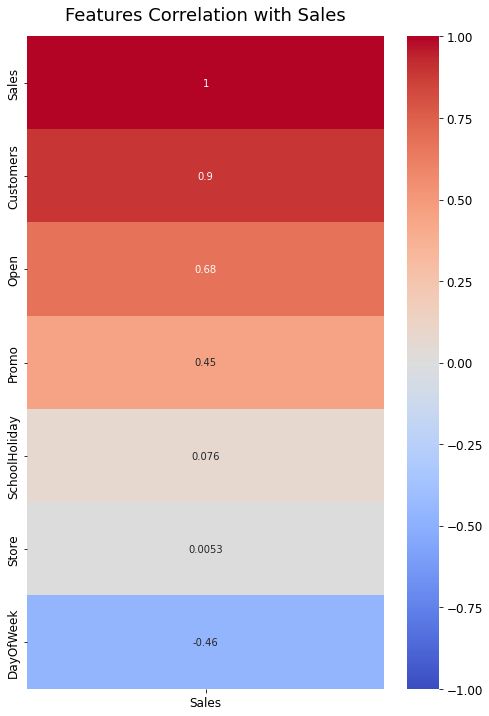

In [ ]:
#Plot the features correlation with Sales
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['Sales']].sort_values(by='Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlation with Sales', fontdict={'fontsize':18}, pad=16)

In [ ]:
# Check the skewness
#train_explore = undummify(train_new)
train_explore = labelencoding(train_explore)
skewness=[]
for i in train_explore.columns:
    skewness.append(train_explore[i].skew())
pd.DataFrame(data=skewness,index=train_explore.columns,columns=['skewness']).sort_values(by='skewness',ascending=False)

Label Encoding: DayOfWeek - 7
Label Encoding: Open - 2
Label Encoding: Promo - 2
Label Encoding: StateHoliday - 4
Label Encoding: SchoolHoliday - 2
Label Encoding: year - 3
Label Encoding: Store - 1115
Label Encoding: day - 31
Label Encoding: month - 12


skewness
StateHoliday   7.330131
SchoolHoliday  1.738972
Sales          0.645957
Promo          0.493650
year           0.368486
month          0.305860
day            0.008634
DayOfWeek      0.001649
Store         -0.000988
Open          -1.743754

***Inferences from the Skweness:*** 
* As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. The highly skewed parameters is a sign of some outliers.

- Hence StateHoliday (correlates with SchoolHoliday) and open stores are highly skewed features.

In [ ]:
## Map day and month for EDA below
# Explicitly define the days of the week and month to see sale values,etc.
day_map = {   # Map days from numbers to characters
    0: 'MON',
    1: 'TUE',
    2: 'WED',
    3: 'THU',
    4: 'FRI',
    5: 'SAT',
    6: 'SUN'
}
month_map = {   # Map days from numbers to characters
    0: 'JAN',
    1: 'FEB',
    2: 'MAR',
    3: 'APR',
    4: 'MAY',
    5: 'JUN',
    6: 'JUL',
    7: 'AUG',
    8: 'SEP',
    9: 'OCT',
    10: 'NOV',
    11: 'DEC'
}

train_eda = train.copy()
train_eda['day_of_week_name'] = pd.DatetimeIndex(train_eda['Date']).dayofweek.map(day_map)
train_eda['month_name'] = pd.DatetimeIndex(train_eda['Date']).month.map(month_map)
train_eda['year'] = pd.DatetimeIndex(train_eda['Date']).year # Get the year
train_eda['day'] = pd.DatetimeIndex(train_eda['Date']).day # Get the day
train_eda.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          2  2015-06-30   5735        568     1      1            0   
1      2          2  2015-06-30   9863        877     1      1            0   
2      3          2  2015-06-30  13261       1072     1      1            0   
3      4          2  2015-06-30  13106       1488     1      1            0   
4      5          2  2015-06-30   6635        645     1      1            0   

   SchoolHoliday day_of_week_name month_name  year  day  
0              0              TUE        JUL  2015   30  
1              0              TUE        JUL  2015   30  
2              1              TUE        JUL  2015   30  
3              0              TUE        JUL  2015   30  
4              0              TUE        JUL  2015   30

------------------------------------------------------------------------
Distribution of Sales for All the Stores Combined Over Various Timeframes
------------------------------------------------------------------------


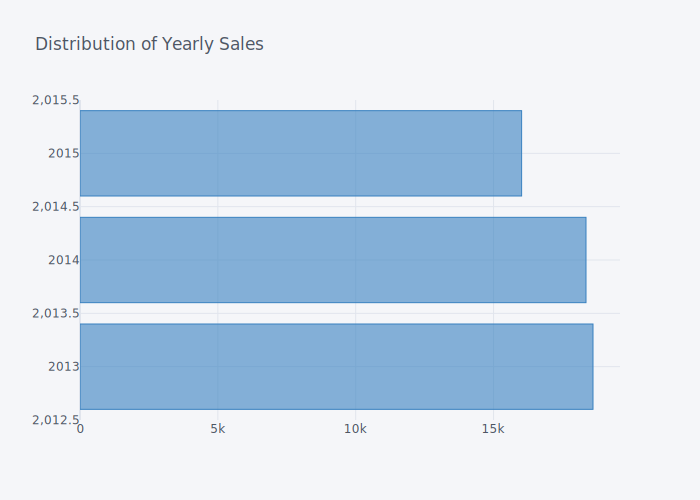

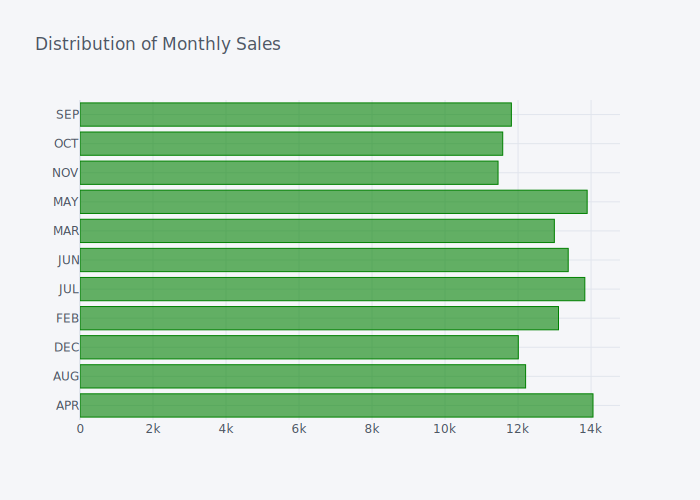

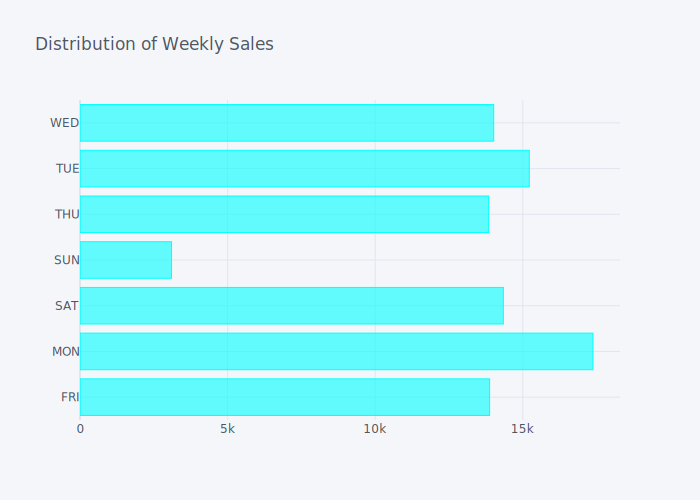

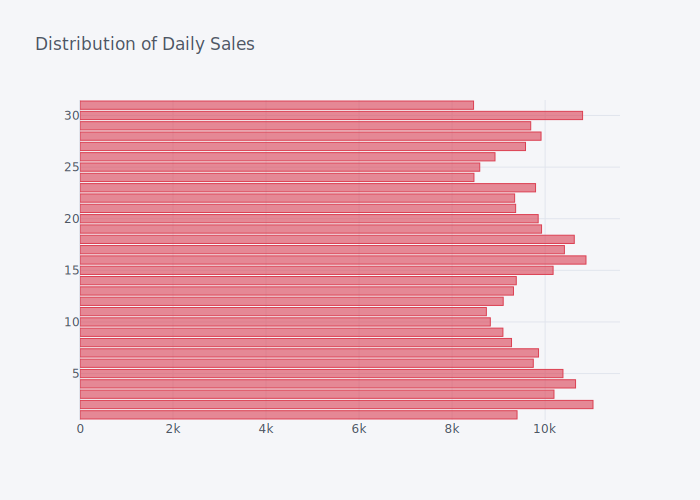

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [ ]:
# Look at the sales over various timeframes for all the stores

if(plotlyme == True):
    df1 = train_eda

    print('------------------------------------------------------------------------')
    print(f'Distribution of Sales for All the Stores Combined Over Various Timeframes')
    print('------------------------------------------------------------------------')
    
    # Year Sales
    df1 = train_eda
    fig1 = plt.figure()
    fig1 = df1.groupby('year')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'blue',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = 'Distribution of Yearly Sales'
                                                                                 )
    fig1.show(renderer='svg') #(renderer="svg")
    
    
    # Monthly Sales
    fig2 = plt.figure()
    fig2 = df1.groupby('month_name')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'green',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = 'Distribution of Monthly Sales'
                                                                                 )
    fig2.show(renderer='svg') #(renderer="svg")
    
    
    

    # Weekly Sales 
    fig3 = plt.figure()
    fig3 = df1.groupby('day_of_week_name')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'cyan',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = 'Distribution of Weekly Sales'
                                                                                 )
    fig3.show(renderer='svg') #(renderer="svg")    
    



    # Daily Sales 
    fig4 = plt.figure()
    fig4 = df1.groupby('day')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'red',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = 'Distribution of Daily Sales'
                                                                                 )
    fig4.show(renderer='svg') #(renderer="svg")  


------------------------------------------------------------------------
Distribution of Sales for Store 359 Over Various Timeframes
------------------------------------------------------------------------


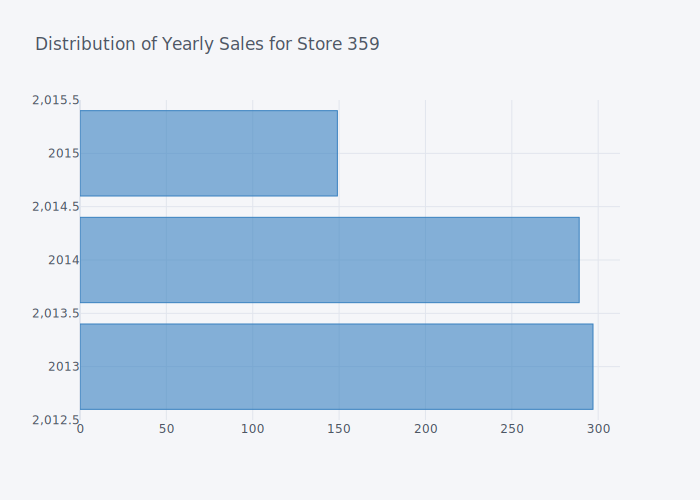

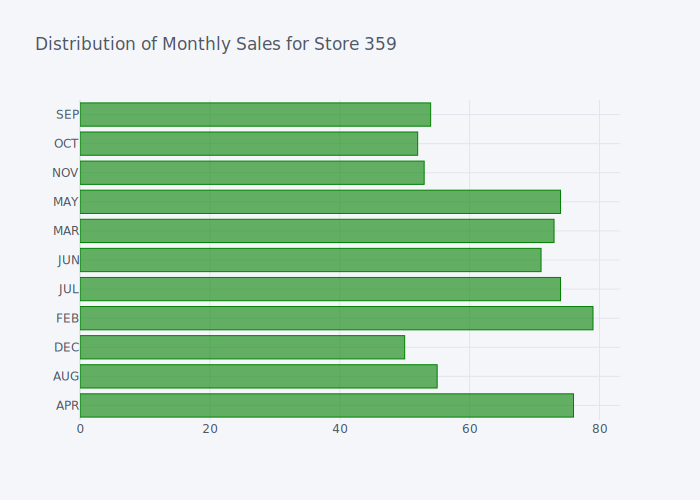

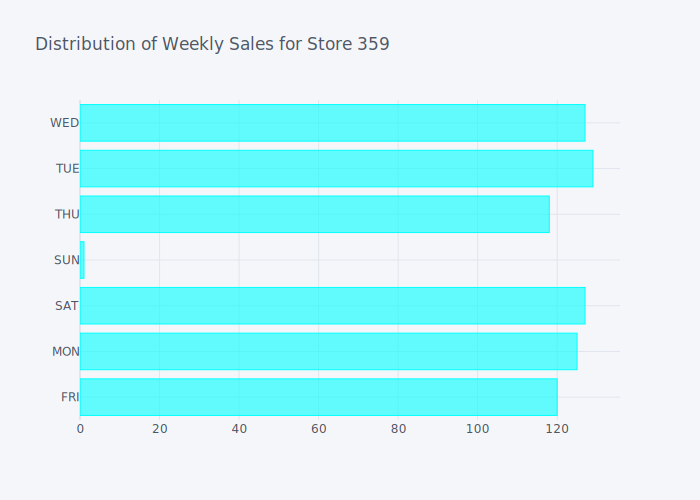

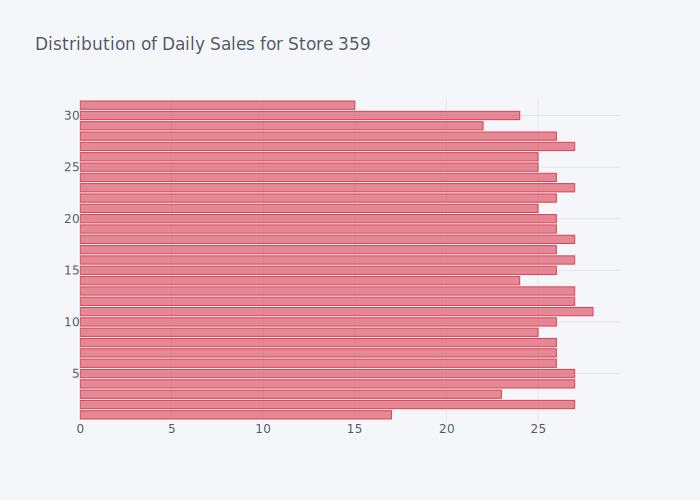

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [ ]:
# Look at the sales over various timeframes for all the stores

if(plotlyme == True):

    random_store = random.choice(range(df1['Store'].nunique())) # Choose a store randomly
    df2 = df1[df1.Store==random_store]

    print('------------------------------------------------------------------------')
    print(f'Distribution of Sales for Store {random_store} Over Various Timeframes')
    print('------------------------------------------------------------------------')
    
    # Year Sales
    fig1 = plt.figure()
    fig1 = df2.groupby('year')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'blue',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = f'Distribution of Yearly Sales for Store {random_store}'
                                                                                 )
    fig1.show(renderer='svg') #(renderer="colab")
    
    
    # Monthly Sales
    fig2 = plt.figure()
    fig2 = df2.groupby('month_name')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'green',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = f'Distribution of Monthly Sales for Store {random_store}'
                                                                                 )
    fig2.show(renderer='svg') #(renderer="svg")
    
    
    

    # Weekly Sales 
    fig3 = plt.figure()
    fig3 = df2.groupby('day_of_week_name')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'cyan',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = f'Distribution of Weekly Sales for Store {random_store}'
                                                                                 )
    fig3.show(renderer='svg') #(renderer="svg")    
    



    # Daily Sales 
    fig4 = plt.figure()
    fig4 = df2.groupby('day')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'red',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = f'Distribution of Daily Sales for Store {random_store} '
                                                                                 )
    fig4.show(renderer='svg') #(renderer="svg")  


In [ ]:
#if(plotlyme == True):
#    fig = go.Figure(
#        data=[go.Bar(y=df1.groupby('day_of_week_name')['Sales'].nunique(),x=)],
#        layout_title_text="Distribution of orders in the Sales"
#    )
#    fig.show(renderer="svg")

In [ ]:
# Define a function to check and remove zero variance columns
def handle_variance(df,threshold=0): #Set default threshold to zero
  variance = df.var()
  var_column = df.columns
  variable = []
  for i in range(0,len(variance)):
    if variance[i]>=threshold: # Set the threshold to your choice
      variable.append(var_column[i]) 
 # print(f'The significant columns are')
 # display(variable)
  return df[variable]

In [ ]:
handle_variance(train_new,0)

Sales  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0        5735.0            1            0            0            0   
1        9863.0            1            0            0            0   
2       13261.0            1            0            0            0   
3       13106.0            1            0            0            0   
4        6635.0            1            0            0            0   
...         ...          ...          ...          ...          ...   
982639      0.0            1            0            0            0   
982640      0.0            1            0            0            0   
982641      0.0            1            0            0            0   
982642      0.0            1            0            0            0   
982643      0.0            1            0            0            0   

        DayOfWeek_6  DayOfWeek_7  Open_1  Promo_1  StateHoliday_1  ...  \
0                 0            0       1        1               0  ...   
1                 0            0       1        1               0  ...   
2                 0            0       1        1               0  ...   
3                 0            0       1        1               0  ...   
4                 0            0       1        1               0  ...   
...             ...          ...     ...      ...             ...  ...   
982639            0            0       0        0               1  ...   
982640            0            0       0        0               1  ...   
982641            0            0       0        0               1  ...   
982642            0            0       0        0               1  ...   
982643            0            0       0        0               1  ...   

        month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0             0        0        0        1        0        0        0   
1             0        0        0        1        0        0        0   
2             0        0        0        1        0        0        0   
3             0        0        0        1        0        0        0   
4             0        0        0        1        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
982639        0        0        0        0        0        0        0   
982640        0        0        0        0        0        0        0   
982641        0        0        0        0        0        0        0   
982642        0        0        0        0        0        0        0   
982643        0        0        0        0        0        0        0   

        month_10  month_11  month_12  
0              0         0         0  
1              0         0         0  
2              0         0         0  
3              0         0         0  
4              0         0         0  
...          ...       ...       ...  
982639         0         0         0  
982640         0         0         0  
982641         0         0         0  
982642         0         0         0  
982643         0         0         0  

[982644 rows x 1170 columns]

#### Linear Regression ML Model - Using Store as a feature

In [ ]:
# Define function to scale the data
def scaleData(data):       
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_colums = data.columns
    data = scaler.fit_transform(data)
    return pd.DataFrame(data,columns=data_colums) 

In [ ]:
# Get the Features and Target for ML training 
X_train = train_new.drop(['Sales'],axis=1)
X_val = test_val_new.drop(['Sales'],axis=1)
y_train = train_new['Sales']
y_val = test_val_new['Sales']

In [ ]:
X_train = scaleData(X_train)
X_val = scaleData(X_val)

In [ ]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(982644, 1169) (34565, 1169) (982644,) (34565,)


In [ ]:
lr_with_StoreID = LinearRegression()
lr_with_StoreID.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_with_StoreID = lr_with_StoreID.predict(X_val)
print('===================================================')
print('Metrics for features that included the Store ID')
print('MSE',np.sqrt(mean_squared_error(y_pred_with_StoreID,y_val)))
print('MAE',mean_absolute_error(y_pred_with_StoreID,y_val))
print('The accuracy of training dataset is',lr_with_StoreID.score(X_train,y_train))
print('The accuracy of the test dataset is',lr_with_StoreID.score(X_val,y_val))
print('===================================================')

Metrics for features that included the Store ID
MSE 1483.5427742707802
MAE 1093.565207550233
The accuracy of training dataset is 0.8365645595889428
The accuracy of the test dataset is 0.8307708054564857


#### Linear Regression ML Model - Without Store as a feature

In [ ]:
# Get the Features and Target for ML training 
X_train_no_store = removecolumns(X_train,'Store')
X_val_no_store = removecolumns(X_val,'Store')
y_train = train_new['Sales']
y_val = test_val_new['Sales']

In [ ]:
lr_without_StoreID = LinearRegression()
lr_without_StoreID.fit(X_train_no_store,y_train)

LinearRegression()

In [ ]:
y_pred_notwith_StoreID = lr_without_StoreID.predict(X_val_no_store)
print('===================================================')
print('Metrics for features without the Store ID')
print('MSE',np.sqrt(mean_squared_error(y_pred_notwith_StoreID,y_val)))
print('MAE',mean_absolute_error(y_pred_notwith_StoreID,y_val))
print('The accuracy of training dataset is',lr_without_StoreID.score(X_train_no_store,y_train))
print('The accuracy of the test dataset is',lr_without_StoreID.score(X_val_no_store,y_val))
print('===================================================')

Metrics for features without the Store ID
MSE 2551.195756009517
MAE 1748.8501702089025
The accuracy of training dataset is 0.5645990410447581
The accuracy of the test dataset is 0.49954767679764356


#### Linear Regression ML Model - Separate Model for each Store

In [ ]:
#df_all_eachstore
# Perform Label Encoding
columns_to_encode = ['DayOfWeek', 'Open', 'Promo','StateHoliday',
                     'SchoolHoliday', 'year','day','month']
          

df_all_eachstore= pd.get_dummies(df_all_eachstore,columns=columns_to_encode,drop_first=True)

In [ ]:
# Separate the data to the original form
#df_all_eachstore = concatenated_data
train_new_eachstore = df_all_eachstore.iloc[:982644].reset_index(drop=True)
test_val_eachstore = df_all_eachstore.iloc[982644:1017209].reset_index(drop=True)
test_eachstore = df_all_eachstore.iloc[1017209:].reset_index(drop=True)
print(train_new_eachstore.shape,test_val_eachstore.shape,test_eachstore.shape)

(982644, 57) (34565, 57) (34565, 57)


In [ ]:
train_new_eachstore

Store    Sales  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0           1   5735.0            1            0            0            0   
1           2   9863.0            1            0            0            0   
2           3  13261.0            1            0            0            0   
3           4  13106.0            1            0            0            0   
4           5   6635.0            1            0            0            0   
...       ...      ...          ...          ...          ...          ...   
982639   1111      0.0            1            0            0            0   
982640   1112      0.0            1            0            0            0   
982641   1113      0.0            1            0            0            0   
982642   1114      0.0            1            0            0            0   
982643   1115      0.0            1            0            0            0   

        DayOfWeek_6  DayOfWeek_7  Open_1  Promo_1  ...  month_3  month_4  \
0                 0            0       1        1  ...        0        0   
1                 0            0       1        1  ...        0        0   
2                 0            0       1        1  ...        0        0   
3                 0            0       1        1  ...        0        0   
4                 0            0       1        1  ...        0        0   
...             ...          ...     ...      ...  ...      ...      ...   
982639            0            0       0        0  ...        0        0   
982640            0            0       0        0  ...        0        0   
982641            0            0       0        0  ...        0        0   
982642            0            0       0        0  ...        0        0   
982643            0            0       0        0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0             0        1        0        0        0         0         0   
1             0        1        0        0        0         0         0   
2             0        1        0        0        0         0         0   
3             0        1        0        0        0         0         0   
4             0        1        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
982639        0        0        0        0        0         0         0   
982640        0        0        0        0        0         0         0   
982641        0        0        0        0        0         0         0   
982642        0        0        0        0        0         0         0   
982643        0        0        0        0        0         0         0   

        month_12  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
982639         0  
982640         0  
982641         0  
982642         0  
982643         0  

[982644 rows x 57 columns]

In [ ]:
# Remove zero variance columns
handle_variance(train_new_eachstore,0.0)

Store    Sales  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0           1   5735.0            1            0            0            0   
1           2   9863.0            1            0            0            0   
2           3  13261.0            1            0            0            0   
3           4  13106.0            1            0            0            0   
4           5   6635.0            1            0            0            0   
...       ...      ...          ...          ...          ...          ...   
982639   1111      0.0            1            0            0            0   
982640   1112      0.0            1            0            0            0   
982641   1113      0.0            1            0            0            0   
982642   1114      0.0            1            0            0            0   
982643   1115      0.0            1            0            0            0   

        DayOfWeek_6  DayOfWeek_7  Open_1  Promo_1  ...  month_3  month_4  \
0                 0            0       1        1  ...        0        0   
1                 0            0       1        1  ...        0        0   
2                 0            0       1        1  ...        0        0   
3                 0            0       1        1  ...        0        0   
4                 0            0       1        1  ...        0        0   
...             ...          ...     ...      ...  ...      ...      ...   
982639            0            0       0        0  ...        0        0   
982640            0            0       0        0  ...        0        0   
982641            0            0       0        0  ...        0        0   
982642            0            0       0        0  ...        0        0   
982643            0            0       0        0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0             0        1        0        0        0         0         0   
1             0        1        0        0        0         0         0   
2             0        1        0        0        0         0         0   
3             0        1        0        0        0         0         0   
4             0        1        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
982639        0        0        0        0        0         0         0   
982640        0        0        0        0        0         0         0   
982641        0        0        0        0        0         0         0   
982642        0        0        0        0        0         0         0   
982643        0        0        0        0        0         0         0   

        month_12  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
982639         0  
982640         0  
982641         0  
982642         0  
982643         0  

[982644 rows x 57 columns]

In [ ]:
range(train_new_eachstore['Store'].nunique())

range(0, 1115)

In [ ]:
y_pred_store=[]

train_each_store = train_new_eachstore.groupby(['Store'])
test_each_store = test_val_eachstore.groupby(['Store'])

for i in range(1,train_new_eachstore['Store'].nunique()+1):
    a = train_each_store.get_group(i)
    b = test_each_store.get_group(i)
    X_train = a.drop(['Sales','Store'],axis=1)
    X_val = b.drop(['Sales','Store'],axis=1)
    y_train = a['Sales']
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_val)
    i1=0
    for pred in b.index:
        y_pred_store.append(pred)
        i1+=1

print('===================================================')
print('Metrics for separate Store')
print('MSE',np.sqrt(mean_squared_error(y_pred_store,y_val)))
print('MAE',mean_absolute_error(y_pred_store,y_val))
print('===================================================')

Metrics for separate Store
MSE 15386.113245618637
MAE 12550.409084333864


#### Average Ensemble Model of first and second model

In [ ]:
average_predict=(y_pred_with_StoreID+y_pred_notwith_StoreID)/float(2)
print('===================================================')
print('Average metrics for both with and without Store ID')
print('MSE',np.sqrt(mean_squared_error(average_predict,y_val)))
print('MAE',mean_absolute_error(average_predict,y_val))
print('===================================================')

Average metrics for both with and without Store ID
MSE 1830.3801879825835
MAE 1306.092825423367


<b> Summary of the initial OLS Model </b>
- From the above 3 models we can conclude that the model performance for when we include (or not include) 'Store as a feature is almost the same.

- The model with each of the stores treated individually showed worse performance compared to the two approach abive. 

## Regularization

#### Regularization using Store as a Feature

In [ ]:
X_train = train_new.drop(['Sales'],axis=1)
X_val = test_val_new.drop(['Sales'],axis=1)
y_train = train_new['Sales']
y_val = test_val_new['Sales']


X_train = scaleData(X_train)
X_val = scaleData(X_val)

rigdeR =Ridge(alpha=12)
rigdeR.fit(X_train,y_train)

y_predict_regularize = rigdeR.predict(X_val)
print('===================================================')
print('Metrics using Store ID as a feature with regularization')
print('MSE',np.sqrt(mean_squared_error(y_predict_regularize,y_val)))
print('MAE',mean_absolute_error(y_predict_regularize,y_val))
print('train model score',rigdeR.score(X_train,y_train))
print('test model score',rigdeR.score(X_val,y_val))
print('===================================================')

Metrics using Store ID as a feature with regularization
MSE 1486.292574238627
MAE 1095.701414413162
train model score 0.8363359250444383
test model score 0.8301428792382727


<b> Comment on the Regularization </b>

- Regualrization did not lead to any significant improvement on the performance of the model.

## Exploring Impact of Closed Stores

In [ ]:
#df_all_eachstore_open = df_all.copy()
#df_all_nostore_open = df_all.copy()

columns_to_encode = ['DayOfWeek', 'Promo','StateHoliday', 
                     'SchoolHoliday', 'year','Store','day','month']

df_all_eachstore_open= pd.get_dummies(df_all_eachstore_open,columns=columns_to_encode,drop_first=True)
#df_all.head()
train_new_eachstore_open = df_all_eachstore_open.iloc[:982644].reset_index(drop=True)
test_val_new_eachstore_open = df_all_eachstore_open.iloc[982644:1017209].reset_index(drop=True)
test_new = df_all_eachstore_open.iloc[1017209:].reset_index(drop=True)
print(train_new.shape,test_val_new.shape,test_new.shape)

(982644, 1170) (34565, 1170) (34565, 1170)


#### Model One - Store as a Feature

In [ ]:
X_train_mdl1 = train_new_eachstore_open.drop(['Sales','Open'],axis=1)
X_val_mdl1 = test_val_new_eachstore_open.drop(['Sales','Open'],axis=1)

lr = LinearRegression()
lr.fit(X_train_mdl1,y_train)
pred1 = lr.predict(X_val_mdl1)

ind=test_val_new_eachstore_open[test_val_new_eachstore_open.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('===================================================')
print('Metrics using Store ID for closed store')    
print('MSE',np.sqrt(mean_squared_error(pred1,y_val)))
print('MAE',mean_absolute_error(pred1,y_val))
print('===================================================')

Metrics using Store ID for closed store
MSE 1300.4758108088865
MAE 876.79506813703


#### Model Two - Store not a Feature

In [ ]:
#df_all_eachstore_open = df_all.copy()
#df_all_nostore_open = df_all.copy()

columns_to_encode = ['DayOfWeek', 'Promo','StateHoliday', 
                     'SchoolHoliday', 'year','day','month']

df_all_nostore_open= pd.get_dummies(df_all_nostore_open,columns=columns_to_encode,drop_first=True)
#df_all.head()
train_new_nostore_open = df_all_nostore_open.iloc[:982644].reset_index(drop=True)
test_val_new_nostore_open = df_all_nostore_open.iloc[982644:1017209].reset_index(drop=True)
test_new = df_all_nostore_open.iloc[1017209:].reset_index(drop=True)
print(train_new_nostore_open.shape,test_val_new_nostore_open.shape,test_new.shape)

(982644, 57) (34565, 57) (34565, 57)


In [ ]:
X_train_mdl2 = train_new_nostore_open.drop(['Sales','Open','Store'],axis=1)
X_val_mdl2 = test_val_new_nostore_open.drop(['Sales','Open','Store'],axis=1)

lr = LinearRegression()
lr.fit(X_train_mdl2,y_train)
pred2 = lr.predict(X_val_mdl2)

ind=test_val_new_nostore_open[test_val_new_nostore_open.Open==0].index
for i in ind:
    pred2[i] = 0
    
print('===================================================')
print('Metrics without Store ID as feature for closed store')     
print('MSE',np.sqrt(mean_squared_error(pred2,y_val)))
print('MAE',mean_absolute_error(pred2,y_val))
print('===================================================')

Metrics without Store ID as feature for closed store
MSE 2572.2387368918603
MAE 1728.5235989113787


#### Model Three - Modeling per Store Type

In [ ]:
pred3=np.zeros(test_val.shape[0])

train_store = train_new_nostore_open.groupby(['Store'])
test_store = test_val_new_nostore_open.groupby(['Store'])

for i in range(1,train_new_nostore_open['Store'].nunique()+1):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Store','Open'],axis=1)
    X_val = b.drop(['Sales','Store','Open'],axis=1)
    Y_train = a['Sales']
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('===================================================')
print('Metrics without Store ID as feature for open store') 
print('MSE',np.sqrt(mean_squared_error(pred3,y_val)))
print('MAE',mean_absolute_error(pred3,y_val))
print('===================================================')

Metrics without Store ID as feature for open store
MSE 941.5217540887892
MAE 639.5011216075736


<b> Comment on Metrics of Models 1-3 </b>
- Based on the error metrics, there is a significant improvement when we model the stores as a group as could be seen from Model 3 above. 
- Based on this improved performance, we carried out regularization of Model 3 below.

#### Regularization of Model 3

In [ ]:
pred_regularize=np.zeros(test_val_new_nostore_open.shape[0])
train_store = train_new_nostore_open.groupby(['Store'])
test_store = test_val_new_nostore_open.groupby(['Store'])



for i in range(1,train_new_nostore_open['Store'].nunique()+1):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Store','Open'],axis=1)
    X_val = b.drop(['Sales','Store','Open'],axis=1)
    Y_train = a['Sales']
    lr = Ridge(alpha=20)
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred_regularize[j]=0
        else:
            pred_regularize[j]=pred[i]
        i+=1
print('===================================================')
print('Metrics without Store ID as feature for closed stores using regularization') 
print('MSE',np.sqrt(mean_squared_error(pred_regularize,y_val)))
print('MAE',mean_absolute_error(pred_regularize,y_val))
print('===================================================')

Metrics without Store ID as feature for closed stores using regularization
MSE 1005.4580435317876
MAE 686.024616194529


<b> Comment on Regularization of Model 3 </b>
- Based on the error metrics, regularization does not improve the model performance:
******

Before regularization:                 MSE 941.52     |      MAE 639.50

after reegularization:  MSE 1005.467   |          MAE 686.02
******

## PCA Analysis and Factor Analysis

### Factor Analysis
<b> Perform factor analysis first before the PCA </b>

In [ ]:
# Perform Bartlett’s test of sphericity, which checks whether or not the observed variables intercorrelate.
chi_square_value,p_value=calculate_bartlett_sphericity(train_new)
chi_square_value, p_value

(17032103.17674987, 0.0)

#### Comment on the Bartlett's test
***The p-value is 0, which implies statistically significant - the observed correlation matrix is not an identity matrix***

In [ ]:
### Perform Kaiser-Meyer-Olkin (KMO) Test - It measures the suitability of data for factor analysis
kmo_all,kmo_model=calculate_kmo(train_new)
kmo_model

3.880893576624906e-05

#### Comment on the KMO 
<b> The overall KMO for our data is practically zero, which indicates that factor analysis is not needed.</b>

## Perform PCA Analysis - TruncatedSVD is more efficient due to the large dataset

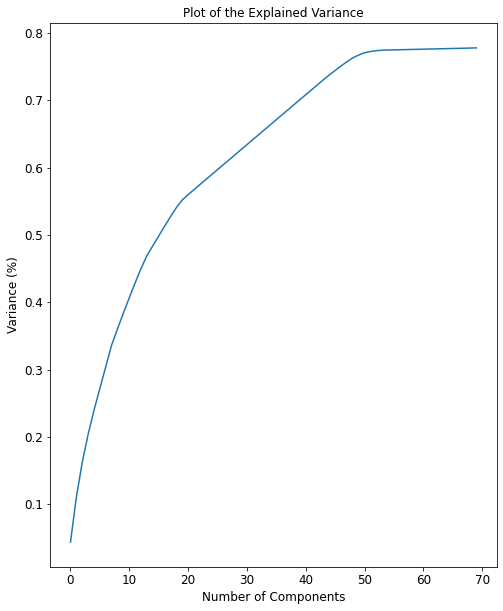

In [ ]:
timet = time.time() # Calculate time
X_train = train_new.drop(['Sales'],axis=1)
X_val = test_val_new.drop(['Sales'],axis=1)
y_train = train_new['Sales']
y_val = test_val_new['Sales']

X_train = scaleData(X_train)
X_val = scaleData(X_val)

#n_components = 100  
#ipca = IncrementalPCA(n_components=n_components,batch_size=n_components)
#pca = ipca.fit(X_train)
##pca = ipca.fit_transform(X_train)

n_components = train_new.shape[-1]-1100  
tpca = TruncatedSVD(n_components=n_components, algorithm='arpack')
pca = tpca.fit(X_train)

plt.figure(figsize=(8,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Plot of the Explained Variance')
plt.show()

### Comment on the PCA
***The PCA shows that only about 80% of the variance is explained by approximately 70 of the components. As you can see, the slope of the cummulative explained variance is still very sleep, which indicates saturation (i.e., approach to 1=>100%) is still far away. I must emphasize that the PCA is very memory intensive operation. I have used the truncatedSVD for it since it shows better scaling with memory utilization.***

In [ ]:
# Perform the Data transformation with the PCA

X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
y_train = train_new['Sales']
y_val = test_val_new['Sales']
print(f'Time for PCA fit and data transformation is: {time.time()-timet}')

Time for PCA fit and data transformation is: 849.1162424087524


In [ ]:
# Testing the accuracy with the PCA using Linear regression
lr_with_StoreID = LinearRegression()
lr_with_StoreID.fit(X_train_pca,y_train)
y_pred_with_StoreID = lr_with_StoreID.predict(X_val_pca)
print('===================================================')
print('Metrics for features that included the Store ID using')
print('MSE',np.sqrt(mean_squared_error(y_pred_with_StoreID,y_val)))
print('MAE',mean_absolute_error(y_pred_with_StoreID,y_val))
print('The accuracy of training dataset is',lr_with_StoreID.score(X_train_pca,y_train))
print('The accuracy of the test dataset is',lr_with_StoreID.score(X_val_pca,y_val))
print('===================================================')

Metrics for features that included the Store ID using
MSE 2521.1324770620063
MAE 1739.8398513617321
The accuracy of training dataset is 0.5728239377033204
The accuracy of the test dataset is 0.5112728384211482


# Beyond OLS - Ensemble ML and Cross Validation

#### Baseline Modeling - Random Forest Regression 
***Let's use RF as baseline ML model to establish the features for the beyond OLS***

In [ ]:
#With Store as Feature
#X_train = train_new.drop(['Sales','Open'],axis=1)
#X_val = test_val_new.drop(['Sales','Open'],axis=1)
X_train = train_new_eachstore_open.drop(['Sales','Open'],axis=1)
X_val = test_val_new_eachstore_open.drop(['Sales','Open'],axis=1)


y_train = train_new['Sales']
y_val = test_val_new['Sales']

catmodel = CatBoostRegressor(loss_function='RMSE',iterations=400)
catmodel.fit(X_train,y_train)
pred_catmodel = catmodel.predict(X_val)

#ind=test_val_new_eachstore_open[test_val_new_eachstore_open.Open==0].index
#for i in ind:
#    pred_rf[i] = 0

print('===================================================')
print('Metrics with Store ID as feature for closed stores using Catboost')     
print('MSE',np.sqrt(mean_squared_error(pred_catmodel,y_val)))
print('MAE',mean_absolute_error(pred_catmodel,y_val))
print('The accuracy of training dataset is',catmodel.score(X_train,y_train))
print('The accuracy of the test dataset is',catmodel.score(X_val,y_val))
print('===================================================')

Learning rate set to 0.256155
0:	learn: 3372.6352407	total: 84.4ms	remaining: 33.7s
1:	learn: 3067.1255429	total: 114ms	remaining: 22.8s
2:	learn: 2869.3037856	total: 142ms	remaining: 18.8s
3:	learn: 2750.3612600	total: 169ms	remaining: 16.8s
4:	learn: 2671.8938808	total: 197ms	remaining: 15.6s
5:	learn: 2613.9327969	total: 223ms	remaining: 14.7s
6:	learn: 2572.0988625	total: 250ms	remaining: 14s
7:	learn: 2540.6625385	total: 276ms	remaining: 13.5s
8:	learn: 2502.0295630	total: 304ms	remaining: 13.2s
9:	learn: 2476.8991321	total: 330ms	remaining: 12.9s
10:	learn: 2455.2051511	total: 355ms	remaining: 12.6s
11:	learn: 2433.9348471	total: 382ms	remaining: 12.3s
12:	learn: 2416.3586215	total: 409ms	remaining: 12.2s
13:	learn: 2401.0107802	total: 435ms	remaining: 12s
14:	learn: 2385.7671614	total: 460ms	remaining: 11.8s
15:	learn: 2372.7879073	total: 485ms	remaining: 11.6s
16:	learn: 2359.1389156	total: 513ms	remaining: 11.6s
17:	learn: 2345.8079123	total: 539ms	remaining: 11.4s
18:	learn: 

In [ ]:
#Without Store as a Feature
#X_train = train_new.drop(['Sales','Open','Store'],axis=1)
#X_val = test_val_new.drop(['Sales','Open','Store'],axis=1)
X_train = train_new_nostore_open.drop(['Sales','Open','Store'],axis=1)
X_val = test_val_new_nostore_open.drop(['Sales','Open','Store'],axis=1)

catmodel =  CatBoostRegressor(loss_function='RMSE',iterations=400)
catmodel.fit(X_train,y_train)
y_pred = catmodel.predict(X_val)
print('The accuracy of training dataset is',catmodel.score(X_train,y_train))
print('The accuracy of the test dataset is',catmodel.score(X_val,y_val))

ind=test_val_new_nostore_open[test_val_new_nostore_open.Open==0].index
for i in ind:
    y_pred[i] = 0

print('===================================================')
print('Metrics without Store as a feature for closed stores using Catboost')    
print('MSE',np.sqrt(mean_squared_error(y_pred,y_val)))
print('MAE',mean_absolute_error(y_pred,y_val))
print('===================================================')

Learning rate set to 0.256155
0:	learn: 3378.6818842	total: 27.6ms	remaining: 11s
1:	learn: 3081.8731561	total: 53.4ms	remaining: 10.6s
2:	learn: 2904.6295070	total: 77.5ms	remaining: 10.3s
3:	learn: 2797.8383785	total: 107ms	remaining: 10.6s
4:	learn: 2732.6908795	total: 134ms	remaining: 10.6s
5:	learn: 2693.3484726	total: 160ms	remaining: 10.5s
6:	learn: 2670.9863296	total: 187ms	remaining: 10.5s
7:	learn: 2650.9143176	total: 210ms	remaining: 10.3s
8:	learn: 2631.6866544	total: 238ms	remaining: 10.3s
9:	learn: 2624.3722963	total: 263ms	remaining: 10.3s
10:	learn: 2613.8241370	total: 289ms	remaining: 10.2s
11:	learn: 2607.3086842	total: 313ms	remaining: 10.1s
12:	learn: 2599.7412624	total: 341ms	remaining: 10.1s
13:	learn: 2596.8544215	total: 365ms	remaining: 10.1s
14:	learn: 2593.0642256	total: 391ms	remaining: 10s
15:	learn: 2590.1959218	total: 418ms	remaining: 10s
16:	learn: 2586.4282486	total: 443ms	remaining: 9.97s
17:	learn: 2584.6669375	total: 469ms	remaining: 9.96s
18:	learn: 

In [ ]:
#Separate model for each Store
pred_each=np.zeros(test_val.shape[0])

train_store = train_new_nostore_open.groupby(['Store'])
test_store = test_val_new_nostore_open.groupby(['Store'])

for i in range(1,train_new_nostore_open['Store'].nunique()+1):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Store','Open'],axis=1).values
    X_val = b.drop(['Sales','Store','Open'],axis=1).values
    y_train = a['Sales']
    clf =  CatBoostRegressor(loss_function='RMSE',iterations=400)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred_each[j]=0
        else:
            pred_each[j]=pred[i]
        i+=1
print('===================================================')
print('Metrics without Store as a feature for closed store for each using Catboost')
print('MSE',np.sqrt(mean_squared_error(pred_each,y_val)))
print('MAE',mean_absolute_error(pred_each,y_val))
print('===================================================')

Streaming output truncated to the last 5000 lines.
217:	learn: 527.3696006	total: 120ms	remaining: 100ms
218:	learn: 526.3734206	total: 120ms	remaining: 99.6ms
219:	learn: 525.5588464	total: 121ms	remaining: 99ms
220:	learn: 524.6028028	total: 122ms	remaining: 98.5ms
221:	learn: 523.7361439	total: 122ms	remaining: 97.9ms
222:	learn: 523.0814152	total: 123ms	remaining: 97.4ms
223:	learn: 521.9915407	total: 123ms	remaining: 96.9ms
224:	learn: 520.9969778	total: 124ms	remaining: 96.5ms
225:	learn: 520.4863648	total: 125ms	remaining: 96ms
226:	learn: 519.7068125	total: 125ms	remaining: 95.6ms
227:	learn: 518.6178917	total: 126ms	remaining: 95.1ms
228:	learn: 517.5581266	total: 127ms	remaining: 94.5ms
229:	learn: 516.7701524	total: 127ms	remaining: 93.9ms
230:	learn: 515.9743089	total: 128ms	remaining: 93.4ms
231:	learn: 514.8114100	total: 128ms	remaining: 92.8ms
232:	learn: 513.8833162	total: 129ms	remaining: 92.3ms
233:	learn: 513.4374817	total: 129ms	remaining: 91.7ms
234:	learn: 512.381

<b> Comment on the baseline Modeling </b>
- The ML for separate model for each store peformed better based on the error metrics. 
- This is followed by when we include Store as one of the features
- Due to the computation demand for case 1, in building models for many approaches, we will adopt including Store as a feature to design our search for the best ML model. Once that is established, we can build an ML model for each of the stores

### Exploring and Exploiting the best ML Model

In [ ]:
# Use PCA from here

In [ ]:
# Get the Features and Target for exploring best ML model 
X_train = X_train_pca
X_test = X_val_pca
y_train = train_new['Sales']
y_test = test_val_new['Sales']


MLA = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=50,max_features='sqrt',max_depth=8,random_state=random_seed,n_jobs=-1),
    #BayesianRidge(),
    #KNeighborsRegressor(),
    #LassoLars(alpha=0.01),
    #LassoLarsCV(),
    #ARDRegression(),
    #svm.LinearSVR(),
    #svm.SVR(), #Expensive
    #svm.NuSVR(), 
    #PLSRegression(n_components=2),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    #XGBRFRegressor(objective = 'reg:squarederror'),
    XGBRegressor(objective = 'reg:squarederror'),
    LGBMRegressor(),
    #AdaBoostRegressor(),
    #GradientBoostingRegressor(),
    #ExtraTreesRegressor(),
    CatBoostRegressor(loss_function='RMSE',iterations=400)
]


col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
cv = RepeatedKFold(n_splits=10, n_repeats=10,random_state=random_seed) #Apply cross-validation
#cv = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 110)

for model in MLA:
    try:
        model.fit(X_train, y_train)
        cross_validation = cross_val_score(model, X_train, y_train, cv  = cv,scoring='r2',n_jobs=-1)
        pred        = model.predict(X_test)
        adj_R2      = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
        Train_Score = model.score(X_train, y_train)
        Test_Score  = model.score(X_test, y_test)
        MSE         = mean_squared_error(y_test, pred)
        MAE         = mean_absolute_error(y_test, pred)
#        MAPE        = mean_absolute_percentage_error(y_test, pred)*100
        RMSE        = np.sqrt(MSE)
        STD         = cross_validation.std()
  

        

        Alg = model.__class__.__name__
        algorithms.loc[idx, 'Algorithm'] = Alg

        algorithms.loc[idx, 'CV-Sc'] = round(cross_validation.mean()* 100, 2)
        algorithms.loc[idx, 'Model-Sc'] = round(Train_Score* 100,2)
        algorithms.loc[idx, 'Adj-Sc']  = round(adj_R2* 100, 2)
        algorithms.loc[idx, 'Test-Sc']   = round(Test_Score* 100, 2)
        algorithms.loc[idx, 'CV-Sc'] = round(cross_validation.mean()* 100, 2)
        algorithms.loc[idx, 'MSE']   = round(MSE, 2)
        algorithms.loc[idx, 'MAE']   = round(MAE, 2)
      #  algorithms.loc[idx, 'MAPE']   = round(MAPE, 2)
        algorithms.loc[idx, 'RMSE']   = round(RMSE, 2)
        algorithms.loc[idx, 'STD']   = round(STD, 4)
                
        CV_Score = pd.DataFrame({'CV-Scores for '+Alg: cross_validation})
        idx+=1
        display(CV_Score)
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

CV-Scores for LinearRegression
0                         0.574054
1                         0.572081
2                         0.574692
3                         0.573358
4                         0.575113
..                             ...
95                        0.573513
96                        0.571354
97                        0.568380
98                        0.571620
99                        0.574960

[100 rows x 1 columns]

CV-Scores for RandomForestRegressor
0                              0.590054
1                              0.589694
2                              0.591019
3                              0.589220
4                              0.590422
..                                  ...
95                             0.589499
96                             0.588738
97                             0.585817
98                             0.589259
99                             0.591266

[100 rows x 1 columns]

CV-Scores for DecisionTreeRegressor
0                              0.822423
1                              0.826207
2                              0.819245
3                              0.828822
4                              0.818992
..                                  ...
95                             0.827014
96                             0.823850
97                             0.822523
98                             0.824400
99                             0.822264

[100 rows x 1 columns]

CV-Scores for ExtraTreeRegressor
0                           0.620689
1                           0.594005
2                           0.635608
3                           0.600406
4                           0.581057
..                               ...
95                          0.615225
96                          0.622742
97                          0.599648
98                          0.610681
99                          0.620074

[100 rows x 1 columns]

CV-Scores for XGBRegressor
0                     0.669393
1                     0.673647
2                     0.671592
3                     0.670662
4                     0.671631
..                         ...
95                    0.670604
96                    0.671272
97                    0.667024
98                    0.669091
99                    0.672374

[100 rows x 1 columns]

CV-Scores for LGBMRegressor
0                      0.842599
1                      0.852635
2                      0.848137
3                      0.848351
4                      0.848987
..                          ...
95                     0.849276
96                     0.843706
97                     0.846535
98                     0.846222
99                     0.847619

[100 rows x 1 columns]

Learning rate set to 0.256155
0:	learn: 3344.7648690	total: 105ms	remaining: 41.8s
1:	learn: 3023.6995202	total: 190ms	remaining: 37.8s
2:	learn: 2809.0230359	total: 262ms	remaining: 34.6s
3:	learn: 2680.8505260	total: 337ms	remaining: 33.4s
4:	learn: 2600.3191675	total: 407ms	remaining: 32.2s
5:	learn: 2534.3564094	total: 473ms	remaining: 31s
6:	learn: 2496.2066770	total: 547ms	remaining: 30.7s
7:	learn: 2471.9411832	total: 609ms	remaining: 29.9s
8:	learn: 2445.3731434	total: 677ms	remaining: 29.4s
9:	learn: 2429.1629132	total: 754ms	remaining: 29.4s
10:	learn: 2406.6755411	total: 821ms	remaining: 29s
11:	learn: 2387.2302939	total: 890ms	remaining: 28.8s
12:	learn: 2362.7833338	total: 956ms	remaining: 28.5s
13:	learn: 2344.1656257	total: 1.03s	remaining: 28.4s
14:	learn: 2322.5000750	total: 1.11s	remaining: 28.5s
15:	learn: 2293.3348630	total: 1.18s	remaining: 28.4s
16:	learn: 2282.5335317	total: 1.26s	remaining: 28.4s
17:	learn: 2270.0662373	total: 1.32s	remaining: 28s
18:	learn: 224

CV-Scores for CatBoostRegressor
0                          0.919076
1                          0.922925
2                          0.920982
3                          0.921085
4                          0.920068
..                              ...
95                         0.921416
96                         0.919901
97                         0.919382
98                         0.919911
99                         0.920300

[100 rows x 1 columns]

In [ ]:
# Show the algorithms
algorithms

Algorithm  CV-Sc  Model-Sc  Adj-Sc  Test-Sc          MSE  \
0       LinearRegression  57.28     57.28   57.28    51.13   6356108.97   
1  RandomForestRegressor  58.96     59.12   59.12    48.94   6640993.63   
2  DecisionTreeRegressor  82.36     96.43   96.43    66.18   4399013.02   
3     ExtraTreeRegressor  59.31     96.43   96.43   -21.10  15749996.34   
4           XGBRegressor  67.04     67.12   67.12    49.08   6622729.09   
5          LGBMRegressor  84.79     84.97   84.97    64.49   4618384.79   
6      CatBoostRegressor  92.03     92.16   92.16    84.05   2074187.70   

       MAE     RMSE     STD  
0  1739.84  2521.13  0.0023  
1  1757.23  2577.01  0.0026  
2  1315.35  2097.38  0.0033  
3  2372.48  3968.63  0.0219  
4  1729.85  2573.47  0.0025  
5  1424.52  2149.04  0.0019  
6   994.43  1440.20  0.0010

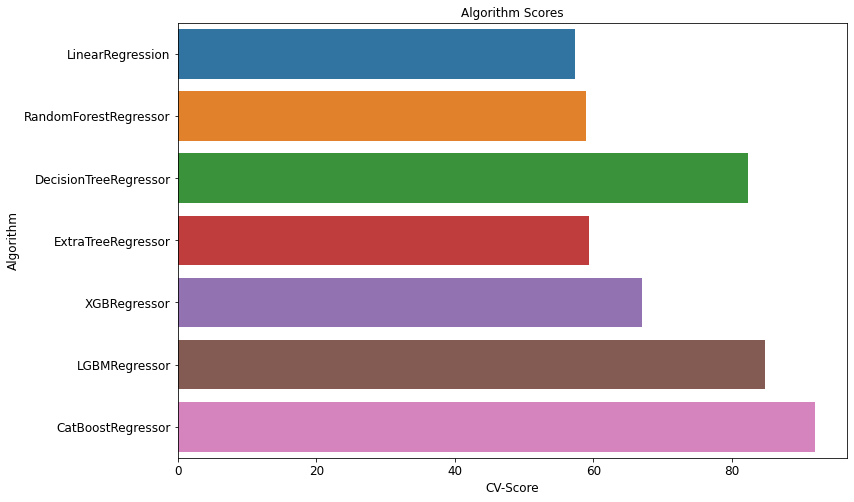

In [ ]:
#Plot them
ax = sns.barplot(x="CV-Sc", y="Algorithm", data = algorithms)
ax.set_xlabel("CV-Score")
ax = ax.set_title("Algorithm Scores")

In [ ]:
#Sort the 5 best models 
algorithms.sort_values(by = ['CV-Sc'], ascending = False, inplace = True)    
algorithms.head()

Algorithm  CV-Sc  Model-Sc  Adj-Sc  Test-Sc          MSE  \
6      CatBoostRegressor  92.03     92.16   92.16    84.05   2074187.70   
5          LGBMRegressor  84.79     84.97   84.97    64.49   4618384.79   
2  DecisionTreeRegressor  82.36     96.43   96.43    66.18   4399013.02   
4           XGBRegressor  67.04     67.12   67.12    49.08   6622729.09   
3     ExtraTreeRegressor  59.31     96.43   96.43   -21.10  15749996.34   

       MAE     RMSE     STD  
6   994.43  1440.20  0.0010  
5  1424.52  2149.04  0.0019  
2  1315.35  2097.38  0.0033  
4  1729.85  2573.47  0.0025  
3  2372.48  3968.63  0.0219

## Comment on Beyond Ordinary Regression Model
<b> With ensemble ML model, we achieve over 90% accuracy in both the training data and the cross-validation score, and a robust test score of ~85% for the test dataset using the CatBoostRegressor, which showed overall best performance of the explored beyond ORM ML models. The high accuracy score is also consistent with the small MAE, RMSE, and the STD. </b> 

### Hyperparameter Tunning of the Best ML Model

In [ ]:
timet = time.time() # Calculate time

bestmodel = CatBoostRegressor()


#space = dict()
#space['n_estimators'] = range(50,126,25)
#space['iterations'] = [50, 100, 200,500]
#space['depth'] = [8,10,12]
#space['learning_rate'] = [0.01, 0.05, 0.1]
#space['loss_function'] =['RMSE']


parameters = {'depth' : [8,10],
              #'learning_rate' : [0.01, 0.05],
              'iterations'    : [400]
              }




#define the number of folds 
folds = RepeatedKFold(n_splits=10, n_repeats=10,random_state=random_seed)
# define search
gsc = RandomizedSearchCV(
    estimator=bestmodel,
    param_distributions=parameters,
#    n_iter=400,
    n_jobs= -1,
    random_state=random_seed,
    return_train_score=True,
    cv=folds
)


grid_result = gsc.fit(X_train, y_train)

print(f'Time for hyperparameter tuning for the best ML model is: {time.time()-timet}')

Learning rate set to 0.256155
0:	learn: 3319.9679278	total: 297ms	remaining: 1m 58s
1:	learn: 2969.2351259	total: 591ms	remaining: 1m 57s
2:	learn: 2751.0343990	total: 894ms	remaining: 1m 58s
3:	learn: 2606.9482899	total: 1.19s	remaining: 1m 57s
4:	learn: 2477.8892865	total: 1.5s	remaining: 1m 58s
5:	learn: 2414.7510819	total: 1.79s	remaining: 1m 57s
6:	learn: 2352.9926299	total: 2.09s	remaining: 1m 57s
7:	learn: 2231.8767352	total: 2.4s	remaining: 1m 57s
8:	learn: 2202.8093013	total: 2.69s	remaining: 1m 57s
9:	learn: 2118.7047055	total: 3.04s	remaining: 1m 58s
10:	learn: 2099.8824954	total: 3.36s	remaining: 1m 58s
11:	learn: 2018.6214331	total: 3.67s	remaining: 1m 58s
12:	learn: 1991.0154516	total: 3.98s	remaining: 1m 58s
13:	learn: 1960.5403026	total: 4.29s	remaining: 1m 58s
14:	learn: 1873.7727892	total: 4.61s	remaining: 1m 58s
15:	learn: 1861.9506259	total: 4.91s	remaining: 1m 57s
16:	learn: 1812.0658128	total: 5.21s	remaining: 1m 57s
17:	learn: 1801.6271149	total: 5.51s	remaining:

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
means_trainscores = grid_result.cv_results_['mean_train_score'] #mean_train_score
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for test_mean, train_mean,stdev, param in zip(means,means_trainscores,stds,params):
  print("The test_mean is: %f and train_mean is: %f with std : %f and parameters: %r" % (test_mean,train_mean,stdev, param))

Best: 0.957214 using {'iterations': 400, 'depth': 10}
The test_mean is: 0.944279 and train_mean is: 0.946401 with std : 0.000802 and parameters: {'iterations': 400, 'depth': 8}
The test_mean is: 0.957214 and train_mean is: 0.961749 with std : 0.000751 and parameters: {'iterations': 400, 'depth': 10}


In [ ]:
bestmodel = CatBoostRegressor(**grid_result.best_params_)
bestmodel.fit(X_train, y_train)


Learning rate set to 0.256155
0:	learn: 3319.9679278	total: 304ms	remaining: 2m 1s
1:	learn: 2969.2351259	total: 611ms	remaining: 2m 1s
2:	learn: 2751.0343990	total: 918ms	remaining: 2m 1s
3:	learn: 2606.9482899	total: 1.22s	remaining: 2m 1s
4:	learn: 2477.8892865	total: 1.55s	remaining: 2m 2s
5:	learn: 2414.7510819	total: 1.86s	remaining: 2m 2s
6:	learn: 2352.9926299	total: 2.18s	remaining: 2m 2s
7:	learn: 2231.8767352	total: 2.51s	remaining: 2m 2s
8:	learn: 2202.8093013	total: 2.82s	remaining: 2m 2s
9:	learn: 2118.7047055	total: 3.16s	remaining: 2m 3s
10:	learn: 2099.8824954	total: 3.47s	remaining: 2m 2s
11:	learn: 2018.6214331	total: 3.8s	remaining: 2m 3s
12:	learn: 1991.0154516	total: 4.12s	remaining: 2m 2s
13:	learn: 1960.5403026	total: 4.45s	remaining: 2m 2s
14:	learn: 1873.7727892	total: 4.79s	remaining: 2m 2s
15:	learn: 1861.9506259	total: 5.1s	remaining: 2m 2s
16:	learn: 1812.0658128	total: 5.42s	remaining: 2m 2s
17:	learn: 1801.6271149	total: 5.74s	remaining: 2m 1s
18:	learn:

In [ ]:
#Get the model accuracy on the training and the test set
pred        = bestmodel.predict(X_test)
print('------------------------------------------------------------------')
print('Accuracy and error metrics for the best model beyond OLS')
print('Accuracy Score of the training dataset %.5f' %bestmodel.score(X_train,y_train))
print('Accuracy Score of test dataset %.5f' %bestmodel.score(X_test,y_test))
print('RMSE is %.5f'%np.sqrt(mean_squared_error(y_test, pred))  )
print('MAE is %.5f'%mean_absolute_error(y_test, pred)) 
print('------------------------------------------------------------------')

------------------------------------------------------------------
Accuracy and error metrics for the best model beyond OLS
Accuracy Score of the training dataset 0.96188
Accuracy Score of test dataset 0.84529
RMSE is 1418.45497
MAE is 952.74206
------------------------------------------------------------------


### Comment on the Hyperparameter of Best Model
<b> Using the hyperparameters, we obtained 96% accuracy and 84% accuracy in the training and test dataset in contrast to ~50% using ordinary regression model. The accompanying error metrics are also very small compared to the ordinary regression model.

In [ ]:
# Feature importance for the best model - Not necessary due to the PCA and large features

#xplot = X_train.columns
#yplot = bestmodel.feature_importances_

#fig, ax = plt.subplots(figsize=(12,8))    
#width = 0.75 # the width of the bars 
#ind = np.arange(len(yplot))  # the x locations for the groups
#ax.barh(ind, yplot, width, color="blue")
#ax.set_yticks(ind+width/2)
#ax.set_yticklabels(xplot, minor=False)
#plt.title('Distribution of Feature Importance')
#plt.xlabel('Importance')
#plt.ylabel('Features')
#ax.bar_label(ax.containers[0],label_type='edge',fmt='%.2f')

#plt.show()

# Time Series Modeling

In [ ]:
parser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
Train = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date',date_parser=parser)
Test_val = pd.read_csv("test_data_hidden.csv", parse_dates=['Date'], index_col='Date',date_parser=parser)
Train=Train[['Store','Sales','Open','DayOfWeek']]
Test_val=Test_val[['Store','Sales','Open','DayOfWeek']]
print('-----------------------------------------')
print ('\n Data format for time series modeling')
print('-----------------------------------------')
Train.sort_values(['Date'],axis=0,inplace=True)
Test_val.sort_values(['Date'],axis=0,inplace=True)
print(Train.head())

-----------------------------------------

 Data format for time series modeling
-----------------------------------------
            Store  Sales  Open  DayOfWeek
Date                                     
2013-01-01   1115      0     0          2
2013-01-01    379      0     0          2
2013-01-01    378      0     0          2
2013-01-01    377      0     0          2
2013-01-01    376      0     0          2


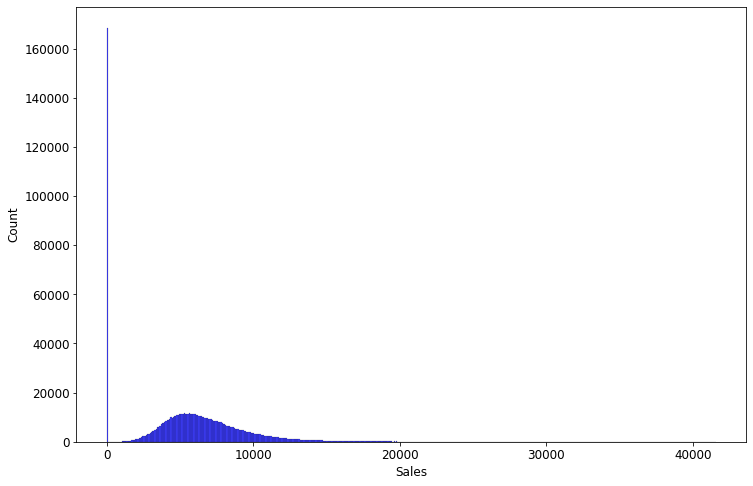

In [ ]:
#Plot the histogram
sns.histplot(Train['Sales'],color='blue')

In [ ]:
# Alot of stuff going on at zero. Let's handle it per store. We can automatically and randomly do that.

In [ ]:
#Look at the whole data first before specific stores
#Train.groupby(['Store'])
random_store = random.choice(range(Train['Store'].nunique())) # Choose a store randomly
ts = Train[Train.Store==random_store]
ts = ts['Sales']

In [ ]:
# Also determine a random store for testing
random_test_store = random.choice(range(Test_val['Store'].nunique()))
test_store_random=Test_val[Test_val.Store==random_test_store]
test_store_random = test_store_random['Sales']

In [ ]:
ts.head()

Date
2013-01-01       0
2013-01-02    6299
2013-01-03    5397
2013-01-04    5826
2013-01-05    4405
Name: Sales, dtype: int64

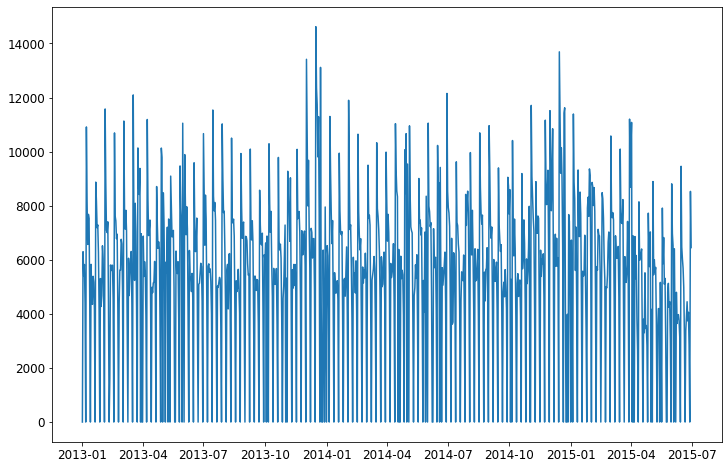

In [ ]:
plt.plot(ts)

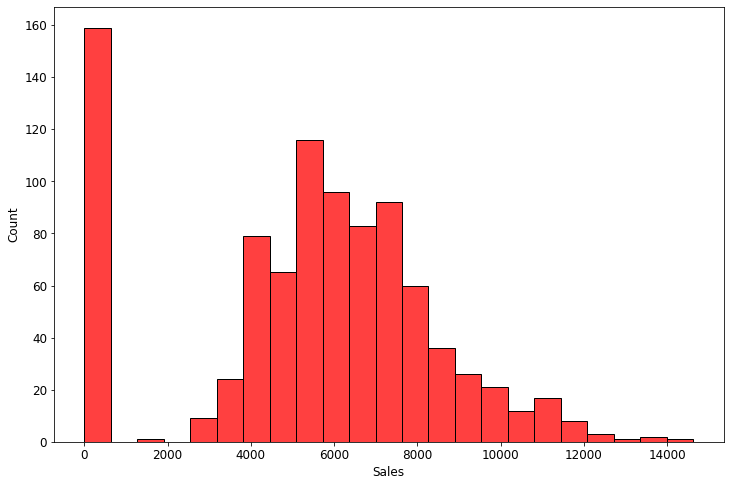

In [ ]:
sns.histplot(ts,color='red')

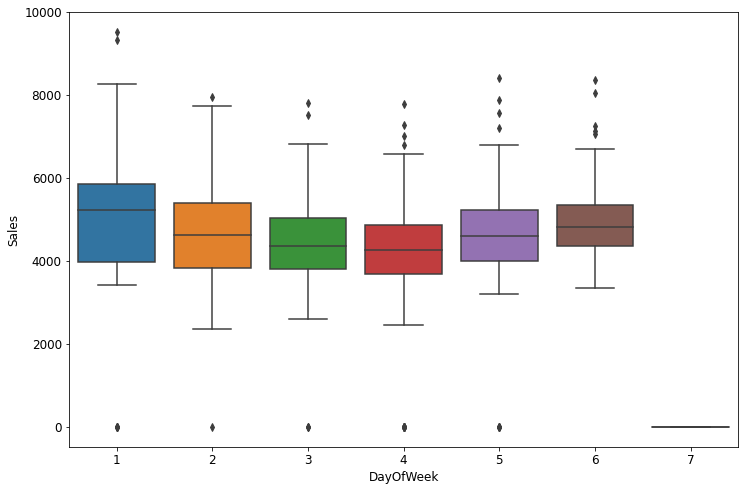

In [ ]:
#Plot the box plot
# Plot first for store ID one 
store_ID1=Train[Train.Store==1]
test_store_ID1=Test_val[Test_val.Store==1]
sns.boxplot(x="DayOfWeek", y="Sales", data=store_ID1)

<b> Here, Monday=1, Sunday=7. </b>

- Here we can find on Sunday stores are closed. Monday has little larger sales, Thurdays has little smaller. There's a few outliers on all days(except Sunday) but it is less on Weekdays(1,3)

[Text(0.5, 1.0, 'Box plot Distribution for the Sales per Week of Store 770')]

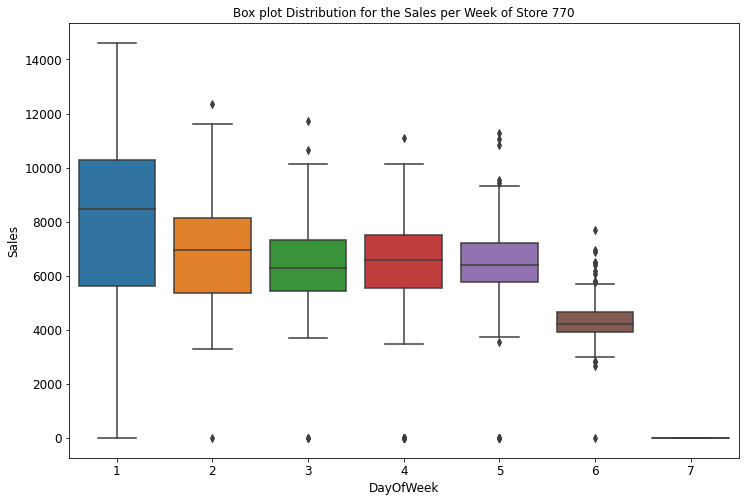

In [ ]:
store_ID_random=Train[Train.Store==random_store]
test_store_ID_random=Test_val[Test_val.Store==random_store]

sns.boxplot(x="DayOfWeek", y="Sales", data=store_ID_random).set(title=f'Box plot Distribution for the Sales per Week of Store {random_store}')

In [ ]:
decomposition =  seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

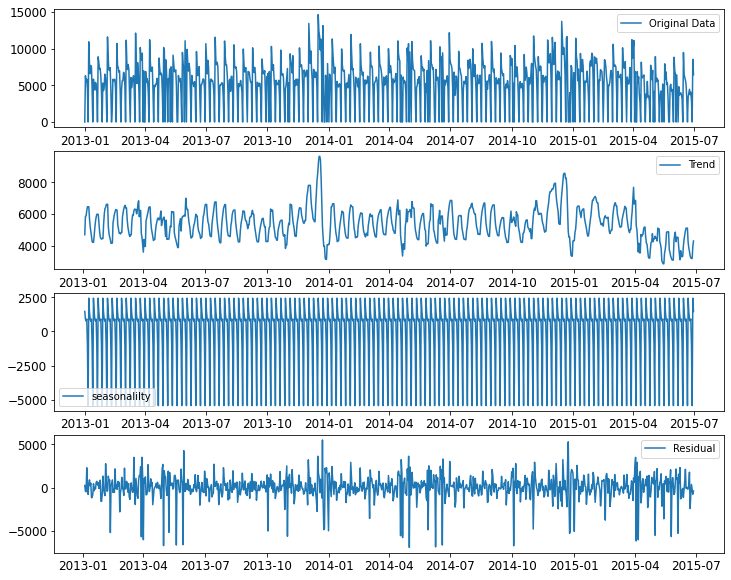

In [ ]:
# Plot 
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(ts, label = 'Original Data')
plt.legend(loc = 'best')


plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonalilty')
plt.legend(loc = 'best')
           
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

In [ ]:
def determine_stationarity(timeseries):
    
    #Obtain rolling statistics
    rolling_mean = timeseries.rolling(12).mean()
    rolling_std = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='orange',label='Original dataset')
    mean = plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label = 'Rolling STD')
    
    plt.legend(loc='best')
    plt.title('The Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Determine Dickey-Fuller satistics:
    print('--------------------------------------')
    print('Results of Dickey-Fuller Statistics:')
    print('--------------------------------------')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags used','Number of Observations'])
    for key,value in df_test[4].items():
        df_output['The Critical Value (%s)'%key] = value
    print(df_output)

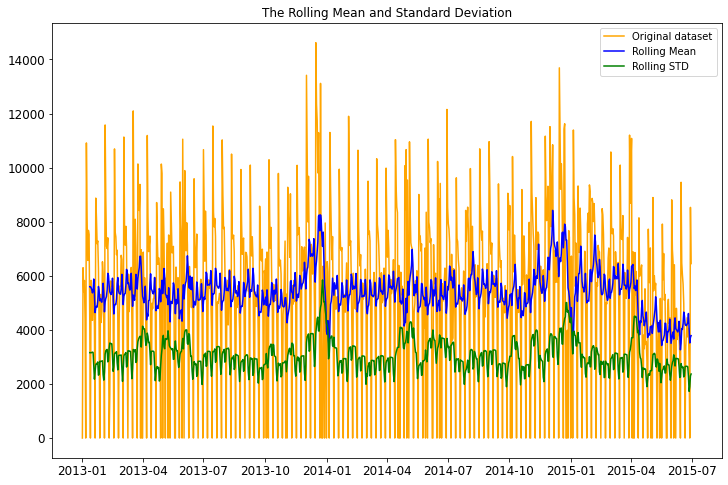

--------------------------------------
Results of Dickey-Fuller Statistics:
--------------------------------------
Test Statistic               -3.780302
p-value                       0.003115
Lags used                    20.000000
Number of Observations      890.000000
The Critical Value (1%)      -3.437719
The Critical Value (5%)      -2.864793
The Critical Value (10%)     -2.568502
dtype: float64


In [ ]:
determine_stationarity(ts)

<b> Inference from the Statistics </b>

- The smaller p-value more likely is a sign that the trend is stationary. Here our p-value is less than 10^-4. Note, since we randomly choose a store, this value can easily change. It's actually good, but as we just visually found a little downward trend, we want to be more strict, i.e. if the p value further decreases, this series would be more likely to be stationary. To get a stationary data, there's many techiniques. We can use log, differencing etc.

In [ ]:
#ts_diff = ts-ts.shift()
#ts_diff = ts_diff-ts.shift()
#plt.plot(ts_diff)

In [ ]:
#plot_acf(ts_diff.dropna())

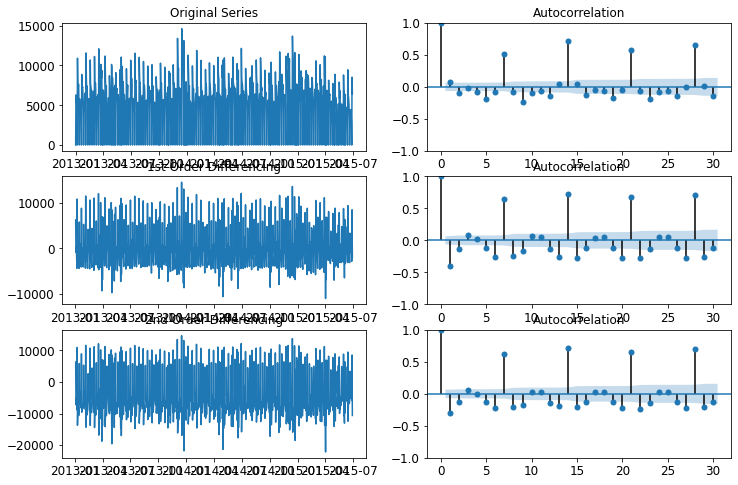

In [ ]:
#plt.rcParams.update({'figure.figsize':(10,12), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(ts); axes[0, 0].set_title('Original Series')
plot_acf(ts, ax=axes[0, 1])

# 1st Differencing
ts_diff1 = ts-ts.shift()
ts_diff1.dropna(inplace=True)

axes[1, 0].plot(ts_diff1); axes[1, 0].set_title('1st Order Differencing')
plot_acf(ts_diff1, ax=axes[1, 1])

# 2nd Differencing
ts_diff2 = (ts-ts.shift())-ts.shift()
ts_diff2.dropna(inplace=True)
axes[2, 0].plot(ts_diff2); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(ts_diff2, ax=axes[2, 1])

plt.show()

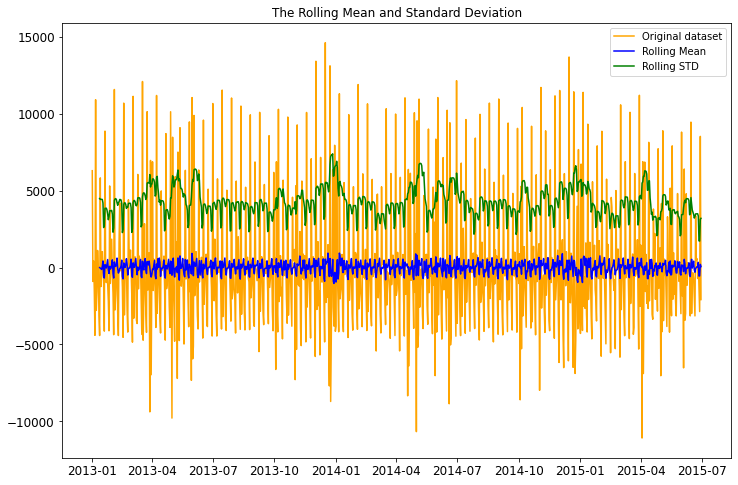

--------------------------------------
Results of Dickey-Fuller Statistics:
--------------------------------------
Test Statistic             -1.390264e+01
p-value                     5.697276e-26
Lags used                   1.900000e+01
Number of Observations      8.900000e+02
The Critical Value (1%)    -3.437719e+00
The Critical Value (5%)    -2.864793e+00
The Critical Value (10%)   -2.568502e+00
dtype: float64


In [ ]:
# Check the statistics of first difference 
determine_stationarity(ts_diff1)

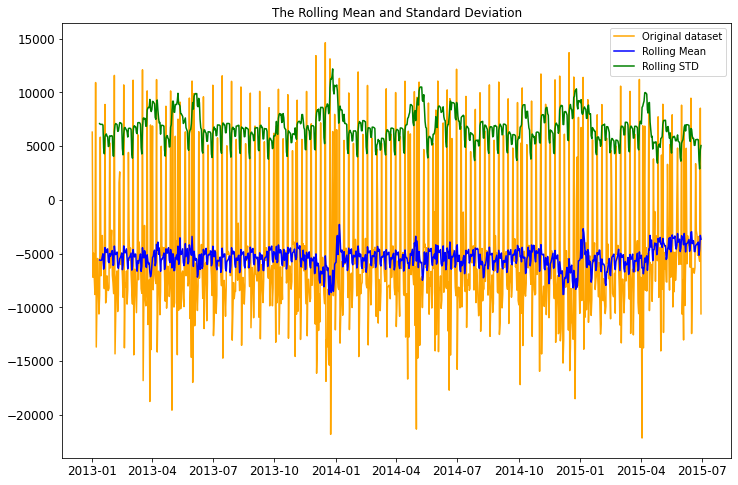

--------------------------------------
Results of Dickey-Fuller Statistics:
--------------------------------------
Test Statistic               -4.662893
p-value                       0.000099
Lags used                    20.000000
Number of Observations      889.000000
The Critical Value (1%)      -3.437727
The Critical Value (5%)      -2.864797
The Critical Value (10%)     -2.568504
dtype: float64


In [ ]:
# Check the statistics of first difference 
determine_stationarity(ts_diff2)

<b> Comment on the Differencing Order </b>

- P-value and the overall statistics seem better in the Order Differencing than in the second order difference

In [ ]:
# Check the Number of differences required for a stationary series
y = ts

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

#### This indicates that we have an overall stationary data without any difference

# Design Various ARIMA Models

### Design the Arima model for RA for the stores

SSE 52631003011.71618  for 770


Text(0.5, 1.0, 'Auto Regression plot for 1st order difference of Store 770')

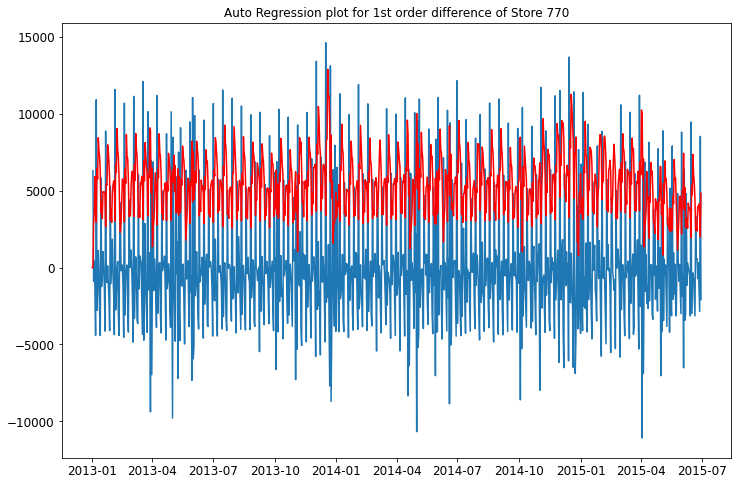

In [ ]:
#Design the Arima model for AR for the stores to make forecasting
#ar_model = sm.tsa.arima.ARIMA(ts, order=(2,1,0))
ar_model = ARIMA(ts, order=(2,1,0))
ar_results =ar_model.fit()
pred = ar_results.forecast() #(steps=31)[0]

plt.plot(ts_diff1)
plt.plot(ar_results.fittedvalues, color = 'red')
#print('MSE',np.sqrt(mean_squared_error(pred,test_store_random)) ,f' for store {random_store}')
#print('MAE',mean_absolute_error(pred,test_store_random), f' for {random_store}')
print('SSE',sum(((ar_results.fittedvalues - ts_diff1).dropna())**2), f' for {random_store}')
plt.title(f'Auto Regression plot for 1st order difference of Store {random_store}')

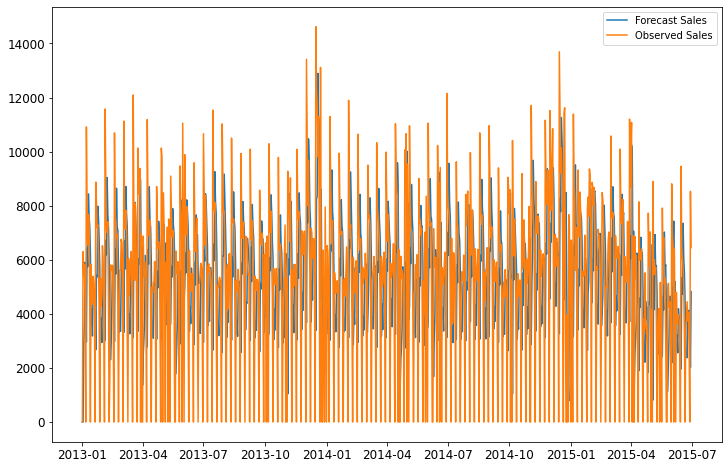

In [ ]:
# Make in-sample prediction
# Make predictions for last 25 values
forecast = ar_results.get_prediction() #(start=-25)
# forecast mean
mean_forecast = forecast.predicted_mean
plt.plot(mean_forecast,label='Forecast Sales')
plt.plot(ts,label='Observed Sales')
plt.legend()
plt.show()

In [ ]:
confidence_intervals = forecast.conf_int()
confidence_intervals

lower Sales   upper Sales
2013-01-01 -8427.765721   8427.765721
2013-01-02 -7523.362783   7523.362783
2013-01-03 -4152.301825   9876.711139
2013-01-04 -3351.424044  10610.999653
2013-01-05 -1068.573526  12893.850171
...                 ...           ...
2015-06-26 -3058.032033  10904.391664
2015-06-27 -2843.755652  11118.668045
2015-06-28 -3571.621907  10390.801790
2015-06-29 -4962.138052   9000.285645
2015-06-30 -2156.744981  11805.678715

[911 rows x 2 columns]

Predicted=4533.834790, Expected=5760.000000
Predicted=6890.482138, Expected=4279.000000
Predicted=5348.350022, Expected=4439.000000
Predicted=4881.622869, Expected=4186.000000
Predicted=4268.888310, Expected=0.000000
Predicted=2411.498411, Expected=3815.000000
Predicted=3200.667336, Expected=3700.000000
Predicted=2394.126829, Expected=4162.000000
Predicted=3947.010093, Expected=3565.000000
Predicted=3730.458305, Expected=3780.000000
Predicted=3874.799403, Expected=3578.000000
Predicted=3612.949289, Expected=0.000000
Predicted=2056.682486, Expected=7614.000000
Predicted=4665.235399, Expected=5321.000000
Predicted=3859.984896, Expected=4535.000000
Predicted=5794.849991, Expected=5032.000000
Predicted=5037.839736, Expected=4684.000000
Predicted=4699.064060, Expected=4835.000000
Predicted=4875.944008, Expected=0.000000
Predicted=2632.493374, Expected=3877.000000
Predicted=3455.888122, Expected=3068.000000
Predicted=2127.127405, Expected=3273.000000
Predicted=3448.969706, Expected=3794.0000

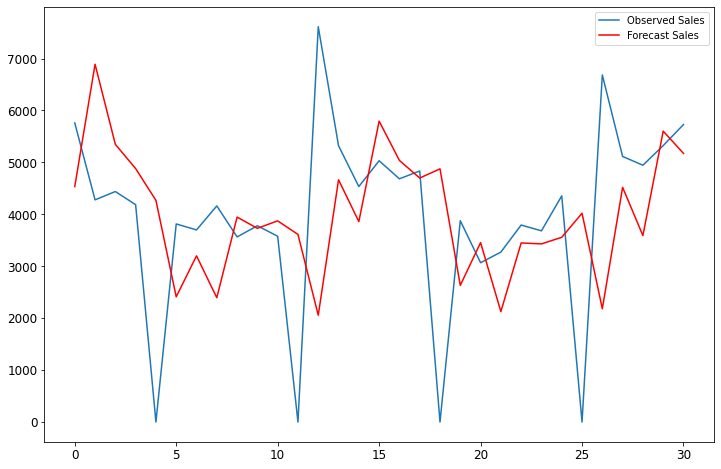

In [ ]:
# Do some predictions 
X_tr = ts.values
X_ts = test_store_random.values

train, test = X_tr, X_ts
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('Predicted=%f, Expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test,label='Observed Sales')
plt.plot(predictions, color='red',label='Forecast Sales')
plt.legend()
plt.show()

In [ ]:
# Out of sample forecast
#diff_forecast = ar_results.get_forecast(steps=20).predicted_mean
mean_forecast = ar_results.get_forecast(steps=20).predicted_mean
from numpy import cumsum
#mean_forecast = cumsum(diff_forecast) #+ ts.iloc[-1,0]
mean_forecast

2015-07-01    4533.834790
2015-07-02    6346.455930
2015-07-03    6030.620630
2015-07-04    5553.315578
2015-07-05    5931.951976
2015-07-06    5893.639187
2015-07-07    5778.582052
2015-07-08    5856.237607
2015-07-09    5854.560066
2015-07-10    5827.532453
2015-07-11    5843.137903
2015-07-12    5844.207101
2015-07-13    5837.995142
2015-07-14    5841.058095
2015-07-15    5841.594548
2015-07-16    5840.194024
2015-07-17    5840.778232
2015-07-18    5840.958210
2015-07-19    5840.647979
2015-07-20    5840.755372
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
#Make dynamical forecast 
forecast = ar_results.get_prediction(start=-25, dynamic=True)
# forecast mean
mean_forecast = forecast.predicted_mean
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()
#confidence_intervals

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -8733.939
Date:                Mon, 09 May 2022   AIC                          17473.877
Time:                        23:57:34   BIC                          17488.317
Sample:                    01-01-2013   HQIC                         17479.390
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5550      0.032    -17.602      0.000      -0.617      -0.493
ar.L2         -0.3600      0.037     -9.801      0.000      -0.432      -0.288
sigma2      1.269e+07   6.14e+05     20.678      0.0

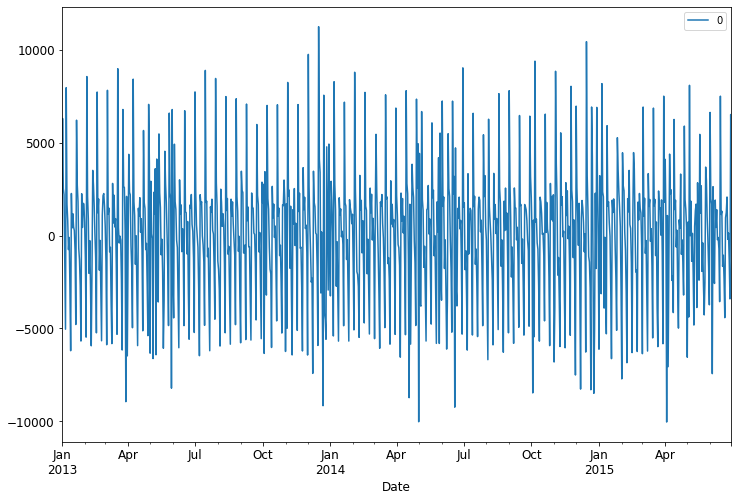

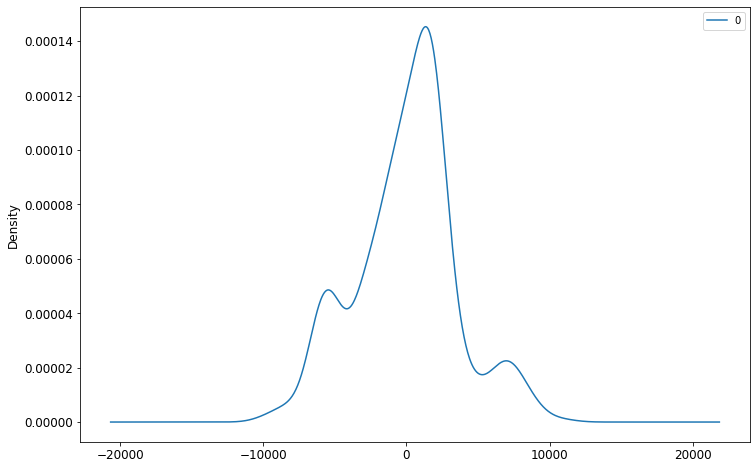

                  0
count    911.000000
mean      12.213057
std     3565.085646
min   -10033.668801
25%    -2045.722877
50%      385.674347
75%     1949.428013
max    11235.525809


In [ ]:
# Print the AR model summary
# summary of fit model
print(ar_results.summary())
# line plot of residuals
residuals = pd.DataFrame(ar_results.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Plot the prediction of sale
#ok = ar_results.predict(dynamic=False) #  type = 'levels' You can as well choose smaller window (200,500). See below
#plt.plot(ok) 
#plt.plot(ts)

### Design the Arima model for MA for the stores

SSE 42368602244.5045  for 770


Text(0.5, 1.0, 'Auto Regression plot for 1st order difference of Store 770')

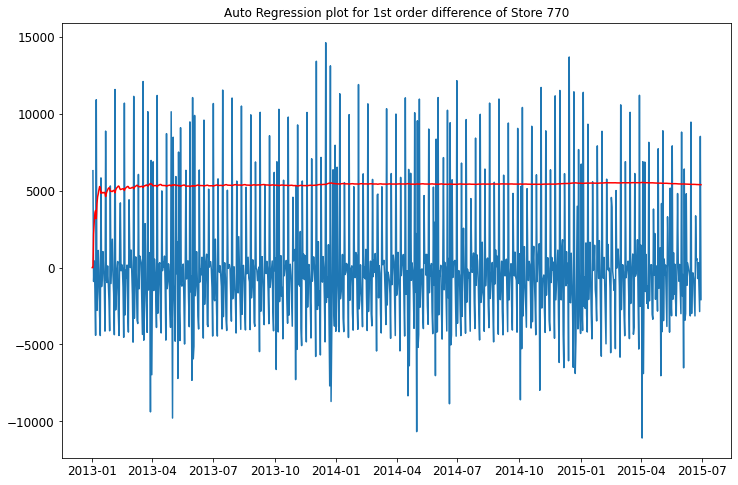

In [ ]:
#Design the Arima model for MA for the stores to make forecasting
ma_model = ARIMA(ts, order=(0,1,1))
ma_results =ma_model.fit()
pred = ma_results.forecast() #(steps=31)[0]

plt.plot(ts_diff1)
plt.plot(ma_results.fittedvalues, color = 'red')
print('SSE',sum(((ma_results.fittedvalues - ts_diff1).dropna())**2), f' for {random_store}')
plt.title(f'Auto Regression plot for 1st order difference of Store {random_store}')

In [ ]:
# Make prediction for AR model
prediction = pd.Series(ma_results.fittedvalues, copy=True)
print(prediction.head())


Date
2013-01-01       0.000000
2013-01-02       0.000000
2013-01-03    2166.816459
2013-01-04    2993.578409
2013-01-05    3570.795538
dtype: float64


In [ ]:
# Plot the cummulative sum
prediction_cum_sum = prediction.cumsum()
print(prediction_cum_sum )

Date
2013-01-01    0.000000e+00
2013-01-02    0.000000e+00
2013-01-03    2.166816e+03
2013-01-04    5.160395e+03
2013-01-05    8.731190e+03
                  ...     
2015-06-26    4.868924e+06
2015-06-27    4.874319e+06
2015-06-28    4.879711e+06
2015-06-29    4.885097e+06
2015-06-30    4.890486e+06
Length: 911, dtype: float64


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -8604.416
Date:                Mon, 09 May 2022   AIC                          17212.832
Time:                        23:57:35   BIC                          17222.459
Sample:                    01-01-2013   HQIC                         17216.507
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999      0.135     -7.433      0.000      -1.264      -0.736
sigma2      9.757e+06   1.45e+06      6.710      0.000    6.91e+06    1.26e+07
Ljung-Box (L1) (Q):                   5.60   Jarque-

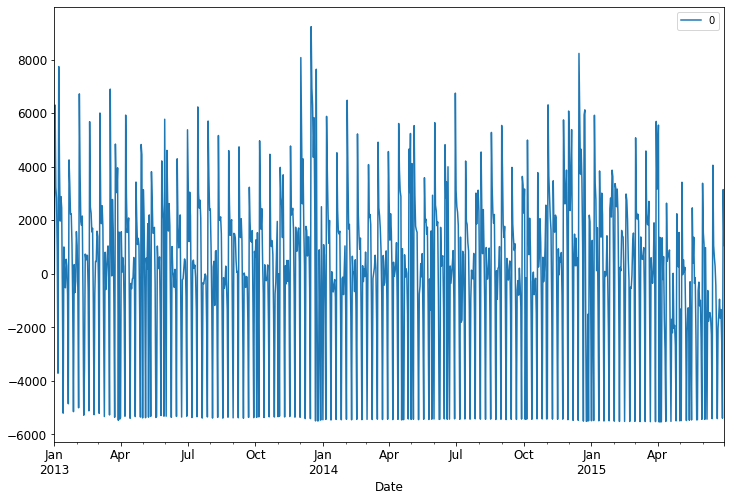

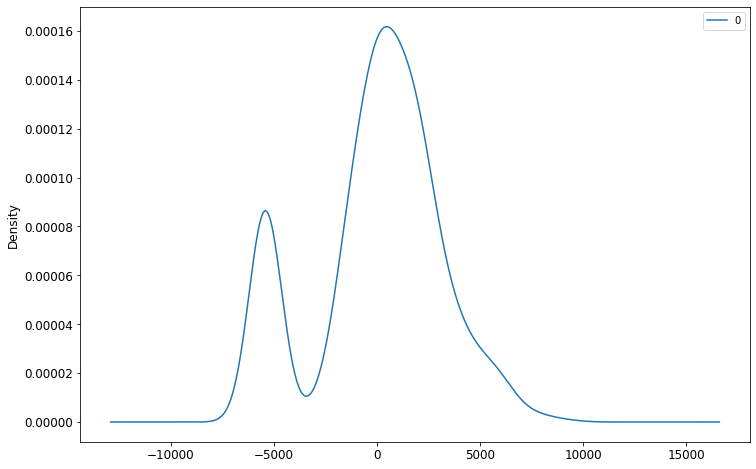

                 0
count   911.000000
mean     27.794587
std    3092.821859
min   -5535.438125
25%   -1299.320023
50%     339.176726
75%    1950.260575
max    9226.253935


In [ ]:
# Print the MA model summary
# summary of fit model
print(ma_results.summary())
# line plot of residuals
residuals = pd.DataFrame(ma_results.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Plot the prediction of sale
#ma_results.plot_predict(dynamic=False) # You can as well choose smaller window (200,500). See below


### Doesn't look good at all. So, the MA does not do well in forecasting the sales

### Design Full Arima model

SSE 43586012564.03285  for 770


Text(0.5, 1.0, 'Auto Regression plot for 1st order difference of Store 770')

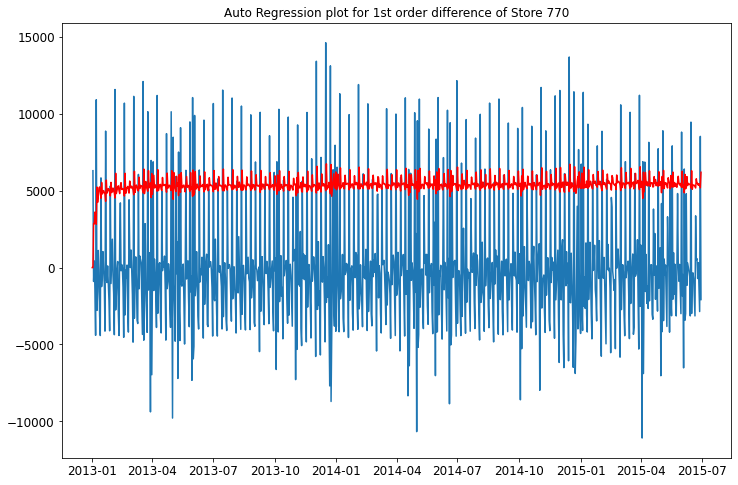

In [ ]:
# Full ARIMA Model
arima_model = ARIMA(ts, order=(2,1,1))
arima_results =arima_model.fit()
pred = ma_results.forecast() #(steps=31)[0]

plt.plot(ts_diff1)
plt.plot(arima_results.fittedvalues, color = 'red')
print('SSE',sum(((arima_results.fittedvalues - ts_diff1).dropna())**2), f' for {random_store}')
plt.title(f'Auto Regression plot for 1st order difference of Store {random_store}')

In [ ]:

# Make prediction for AR model
prediction = pd.Series(arima_results.fittedvalues, copy=True)
print(prediction.head())

Date
2013-01-01       0.000000
2013-01-02       0.000000
2013-01-03    2863.921770
2013-01-04    2844.447988
2013-01-05    3609.208631
dtype: float64


In [ ]:
# Plot the cummulative sum
prediction_cum_sum = prediction.cumsum()
print(prediction_cum_sum )

Date
2013-01-01    0.000000e+00
2013-01-02    0.000000e+00
2013-01-03    2.863922e+03
2013-01-04    5.708370e+03
2013-01-05    9.317578e+03
                  ...     
2015-06-26    4.871697e+06
2015-06-27    4.877146e+06
2015-06-28    4.882459e+06
2015-06-29    4.887646e+06
2015-06-30    4.893843e+06
Length: 911, dtype: float64


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8596.957
Date:                Mon, 09 May 2022   AIC                          17201.914
Time:                        23:57:36   BIC                          17221.168
Sample:                    01-01-2013   HQIC                         17209.265
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0843      0.029      2.904      0.004       0.027       0.141
ar.L2         -0.1005      0.038     -2.667      0.008      -0.174      -0.027
ma.L1         -0.9999      0.041    -24.130      0.0

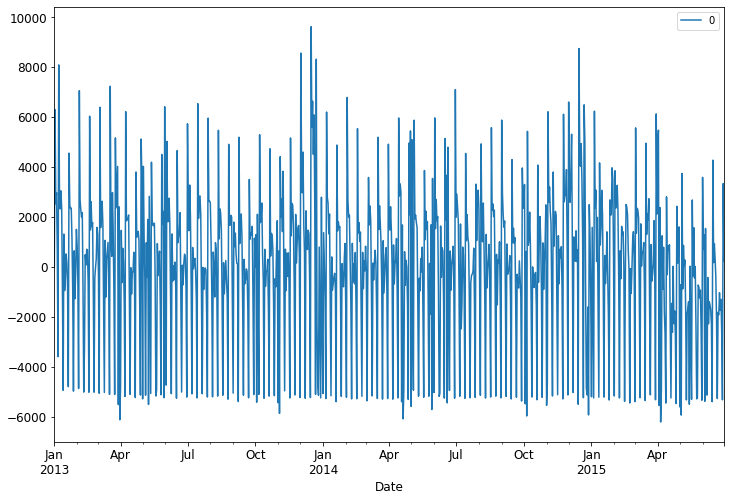

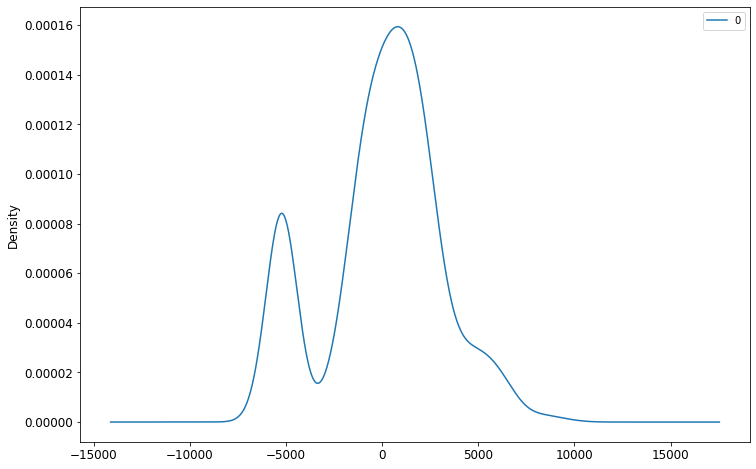

                 0
count   911.000000
mean     24.109929
std    3068.171336
min   -6202.160660
25%   -1333.311157
50%     344.541567
75%    1874.647278
max    9622.161440


In [ ]:
# Print the MA model summary
# summary of fit model
print(arima_results.summary())
# line plot of residuals
residuals = pd.DataFrame(arima_results.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Plot the prediction of sale
#arima_results.plot_predict(dynamic=False) # You can as well choose smaller window (200,500). See below


<b> Summary of the ARIMA Statistics </b>

- The AR model performed better in the overall statistics, showing a better forecast of sales

- From the statistics metrics, the model AIC for the AR is the smallest, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

- From the residual plots, the AR model has overall absence of patterns with an overall constant mean and variance.

- The residual errors for the AR showed least variation with near zero mean and uniform variance. 

- The plot of the actual sales vs the predicted/forcasted sales show a nice trend with the AR model.

## Hyperparameter and Determination of Best ARIMA parameters 

In [ ]:
df = ts
model_auto_arima = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=9, max_q=9, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='trace',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=17231.162, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18500.599, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=17673.655, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=18052.765, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=18045.932, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=17568.898, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=17218.644, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17217.744, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17221.433, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=17210.118, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=17210.823, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   :

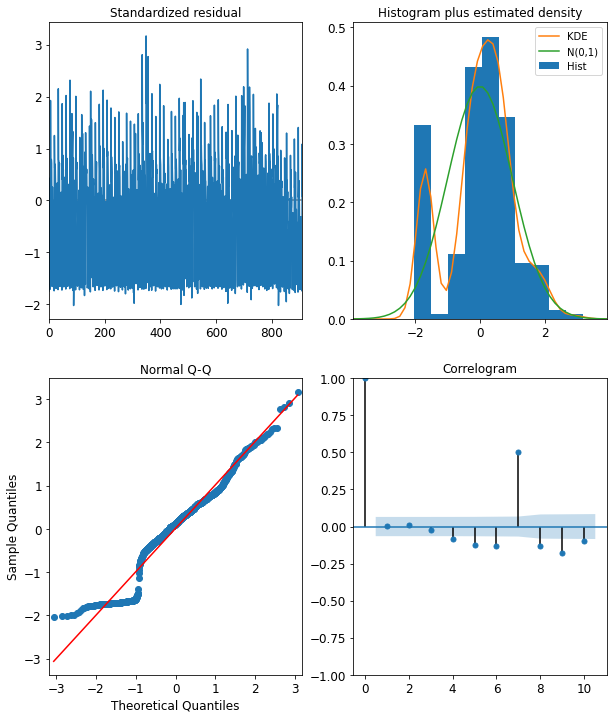

In [ ]:
# Explore interpret the data
model_auto_arima.plot_diagnostics(figsize=(10,12))
plt.show()

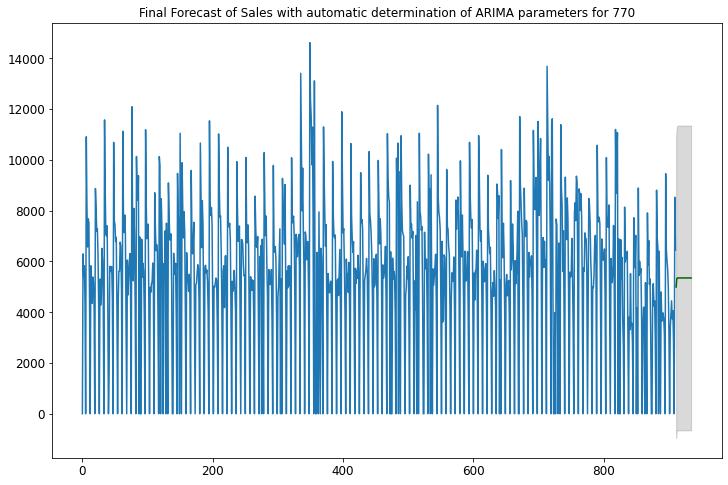

In [ ]:
# Forecast with the best ARIMA model #ARIMA(8,0,5)
n_periods = 24 # Next 24 months
df=ts
fc, confint = model_auto_arima.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.values), len(df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,8))
plt.plot(df.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title(f"Final Forecast of Sales with automatic determination of ARIMA parameters for {random_store}")
plt.show()

SSE 37698075547.24537  for 770


Text(0.5, 1.0, 'Auto Regression plot for 1st order difference of Store 770')

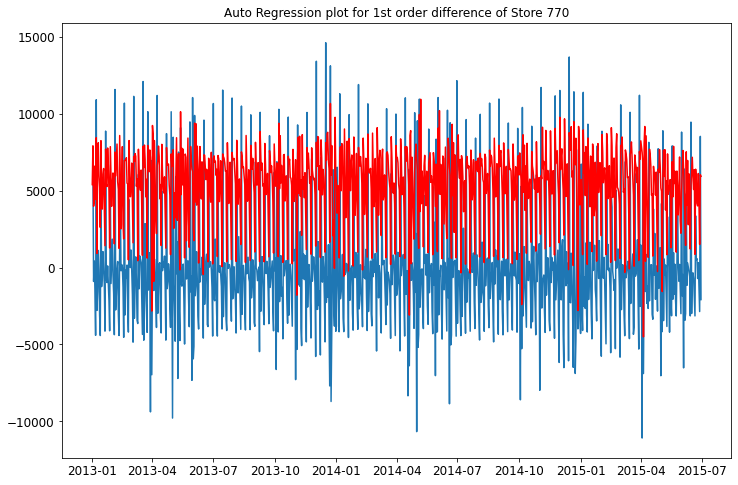

In [ ]:
best_arima = ARIMA(ts, order=(8,0,5))
best_results =best_arima.fit()
pred = best_results.forecast() #(steps=31)[0]

plt.plot(ts_diff1)
plt.plot(best_results.fittedvalues, color = 'red')
print('SSE',sum(((best_results.fittedvalues - ts_diff1).dropna())**2), f' for {random_store}')
plt.title(f'Auto Regression plot for 1st order difference of Store {random_store}')

Predicted=6703.731277, Expected=5760.000000
Predicted=5613.459195, Expected=4279.000000
Predicted=5532.661241, Expected=4439.000000
Predicted=4611.654734, Expected=4186.000000
Predicted=901.588911, Expected=0.000000
Predicted=7228.520019, Expected=3815.000000
Predicted=6346.496338, Expected=3700.000000
Predicted=4469.444483, Expected=4162.000000
Predicted=4315.933691, Expected=3565.000000
Predicted=5699.495409, Expected=3780.000000
Predicted=4001.377590, Expected=3578.000000
Predicted=1744.832516, Expected=0.000000
Predicted=6518.772701, Expected=7614.000000
Predicted=6154.923326, Expected=5321.000000
Predicted=5848.042276, Expected=4535.000000
Predicted=5397.597569, Expected=5032.000000
Predicted=4427.372898, Expected=4684.000000
Predicted=5825.799842, Expected=4835.000000
Predicted=1431.310262, Expected=0.000000
Predicted=7058.176705, Expected=3877.000000
Predicted=5961.133561, Expected=3068.000000
Predicted=4245.298813, Expected=3273.000000
Predicted=4368.564901, Expected=3794.00000

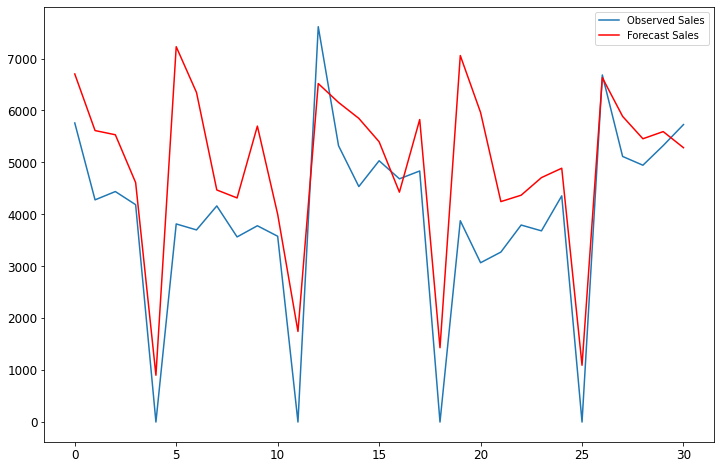

In [ ]:
# Do some predictions 
X_tr = ts.values
X_ts = test_store_random.values

train, test = X_tr, X_ts
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
  model = ARIMA(history, order=(8,0,5))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('Predicted=%f, Expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test,label='Observed Sales')
plt.plot(predictions, color='red',label='Forecast Sales')
plt.legend()
plt.show()

In [ ]:
#Make dynamical forecast (-25 means last 25 entries)
forecast = best_results.get_prediction(start=-25, dynamic=True)
# forecast mean
mean_forecast = forecast.predicted_mean
mean_forecast

2015-06-06    2965.836590
2015-06-07    1446.530325
2015-06-08    7501.558123
2015-06-09    4674.175978
2015-06-10    8247.464058
2015-06-11    2962.559713
2015-06-12    7798.835109
2015-06-13    4445.994448
2015-06-14    2033.044481
2015-06-15    7593.266166
2015-06-16    5048.182101
2015-06-17    7752.446249
2015-06-18    3371.664203
2015-06-19    7398.528891
2015-06-20    4668.904167
2015-06-21    2039.051561
2015-06-22    7407.425881
2015-06-23    5321.080163
2015-06-24    7330.383478
2015-06-25    3745.595755
2015-06-26    7111.887554
2015-06-27    4857.560950
2015-06-28    2095.180039
2015-06-29    7229.023364
2015-06-30    5569.065987
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()
confidence_intervals

lower Sales   upper Sales
2015-06-06 -1332.026333   7263.699513
2015-06-07 -2851.607975   5744.668624
2015-06-08  2777.207026  12225.909220
2015-06-09   -51.886888   9400.238843
2015-06-10  3519.091703  12975.836414
2015-06-11 -1906.940981   7832.060407
2015-06-12  2748.917319  12848.752900
2015-06-13  -955.607209   9847.596105
2015-06-14 -3560.896361   7626.985324
2015-06-15  1973.126084  13213.406248
2015-06-16  -581.305528  10677.669730
2015-06-17  2100.480265  13404.412233
2015-06-18 -2365.130484   9108.458890
2015-06-19  1545.073998  13251.983784
2015-06-20 -1421.679143  10759.487477
2015-06-21 -4158.998018   8237.101140
2015-06-22  1199.550257  13615.301506
2015-06-23  -888.894535  11531.054861
2015-06-24  1098.610186  13562.156770
2015-06-25 -2550.618373  10041.809883
2015-06-26   737.631178  13486.143930
2015-06-27 -1679.899458  11395.021358
2015-06-28 -4506.862475   8697.222553
2015-06-29   624.685502  13833.361225
2015-06-30 -1035.486375  12173.618349

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(8, 0, 5)   Log Likelihood               -8287.206
Date:                Tue, 10 May 2022   AIC                          16604.412
Time:                        00:00:21   BIC                          16676.630
Sample:                    01-01-2013   HQIC                         16631.984
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5396.0560    139.441     38.698      0.000    5122.756    5669.356
ar.L1          0.1311      0.046      2.841      0.005       0.041       0.222
ar.L2         -0.3094      0.033     -9.505      0.0

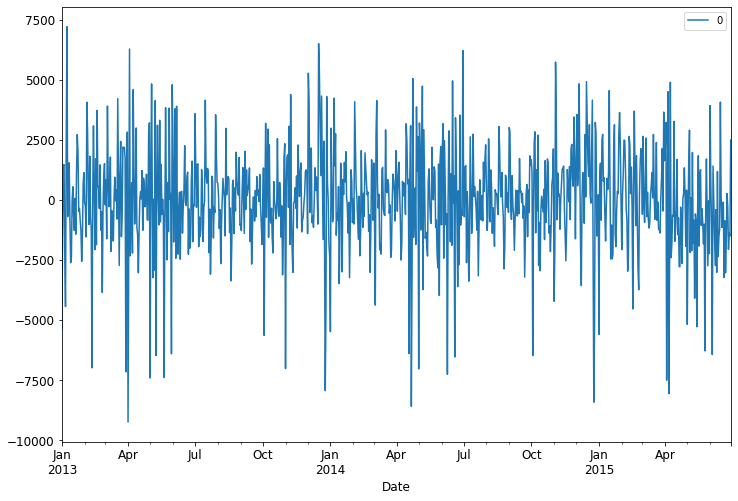

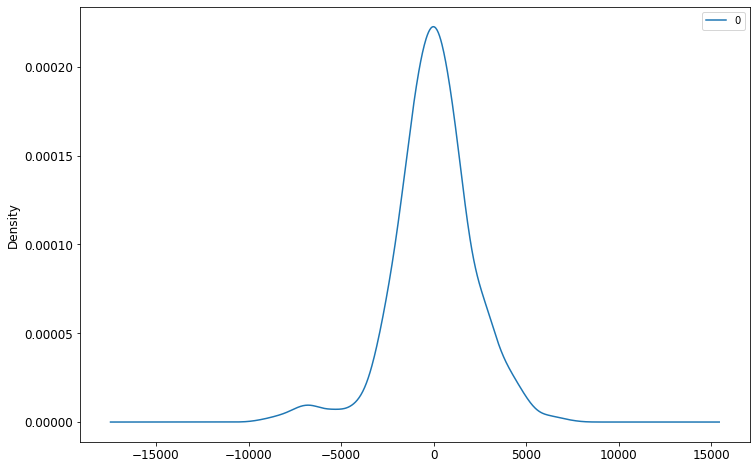

                 0
count   911.000000
mean     -2.783272
std    2164.768319
min   -9236.878084
25%   -1140.009188
50%      41.906022
75%    1212.463358
max    7206.208470


In [ ]:
# Print the AR model summary
# summary of fit model
print(best_results.summary())
# line plot of residuals
residuals = pd.DataFrame(best_results.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

<b> As it is obvious, the optimized parameters has a better Gaussian distribution and smaller AIC. </b>

# Project Task Two: Implementing Neural Networks


In [ ]:
# Define general terms for both LSTM and ANN
batch_size = 128
lr = 2e-4
decay = 6e-8
#scaler = MinMaxScaler(feature_range = (0, 1)) # Standardize data

#### LSTM - Long Short-Term Memory Neural Network

In [ ]:
#X_train = train_new.drop(['Sales','Store'],axis=1)
#X_test = test_val_new.drop(['Sales','Store'],axis=1)
#y_train = train_new['Sales']
#y_test = test_val_new['Sales']

X_train = X_train_pca
X_test = X_val_pca
y_train = train_new['Sales']
y_test = test_val_new['Sales']

In [ ]:
# Define model callbacks
lstm_model_callbacks = [keras.callbacks.ModelCheckpoint('LSTM_retail.h5',monitor='val_loss',save_best_only=True,mode='auto',verbose=1,save_freq="epoch"),
                   keras.callbacks.EarlyStopping(monitor='val_loss',patience=25,mode='auto',min_delta=0.0001,restore_best_weights=True)
]

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = Adam(learning_rate=lr*0.5, decay=decay*0.5), loss = 'mean_squared_error')

In [ ]:
# View model parameters
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 70, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 70, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 111,451
Trainable params: 111,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
lstm_hist = lstm_model.fit(X_train, y_train, 
                           epochs = 5, 
                           batch_size = batch_size, 
                           callbacks = [lstm_model_callbacks],
                           shuffle=True,
                           steps_per_epoch = X_train.shape[0]//batch_size,
                           validation_data=(X_test, y_test),
                           verbose = 1
                           )

Epoch 1/5
7675/7676 [============================>.] - ETA: 0s - loss: 47729196.0000
Epoch 1: val_loss improved from inf to 50133364.00000, saving model to LSTM_retail.h5
7676/7676 [==============================] - 148s 18ms/step - loss: 47728636.0000 - val_loss: 50133364.0000
Epoch 2/5
7675/7676 [============================>.] - ETA: 0s - loss: 47278404.0000
Epoch 2: val_loss improved from 50133364.00000 to 49659264.00000, saving model to LSTM_retail.h5
7676/7676 [==============================] - 137s 18ms/step - loss: 47278484.0000 - val_loss: 49659264.0000
Epoch 3/5
7675/7676 [============================>.] - ETA: 0s - loss: 46834048.0000
Epoch 3: val_loss improved from 49659264.00000 to 49188276.00000, saving model to LSTM_retail.h5
7676/7676 [==============================] - 140s 18ms/step - loss: 46834352.0000 - val_loss: 49188276.0000
Epoch 4/5
7675/7676 [============================>.] - ETA: 0s - loss: 46399100.0000
Epoch 4: val_loss improved from 49188276.00000 to 487205

In [ ]:
print(lstm_hist.history.keys())

dict_keys(['loss', 'val_loss'])


In [ ]:
hist = pd.DataFrame(lstm_hist.history)
hist['epoch'] = lstm_hist.epoch
hist.tail()

loss    val_loss  epoch
0  47728636.0  50133364.0      0
1  47278484.0  49659264.0      1
2  46834352.0  49188276.0      2
3  46399324.0  48720576.0      3
4  45957624.0  48255928.0      4

Train: 45742560.000, Test: 48255944.000


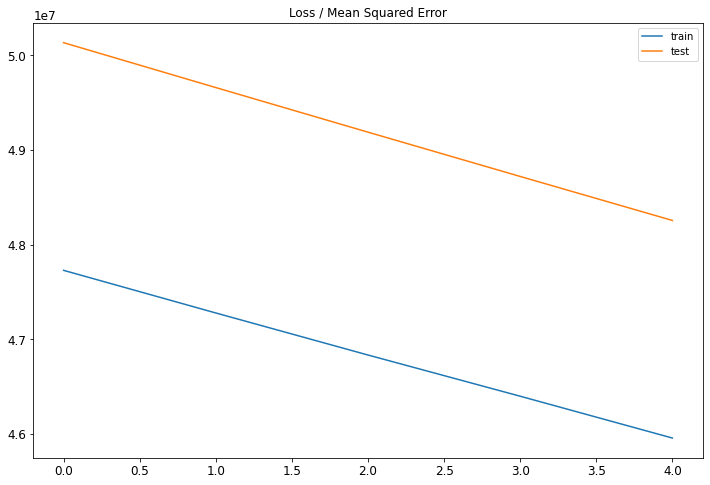

In [ ]:
# evaluate the model
train_mse = lstm_model.evaluate(X_train, y_train, verbose=0)
test_mse = lstm_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(lstm_hist.history['loss'], label='train')
plt.plot(lstm_hist.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Make prediction
predicted_lstm = lstm_model.predict(X_test)
#predicted_lstm= scaler.inverse_transform(predicted_lstm)
print('===================================================')
print('RMSE', np.sqrt(mean_squared_error(predicted_lstm,y_test)))
print('MAE', mean_absolute_error(predicted_lstm,y_test)) 
print('===================================================')

RMSE 6946.648321066684
MAE 5989.255836943057


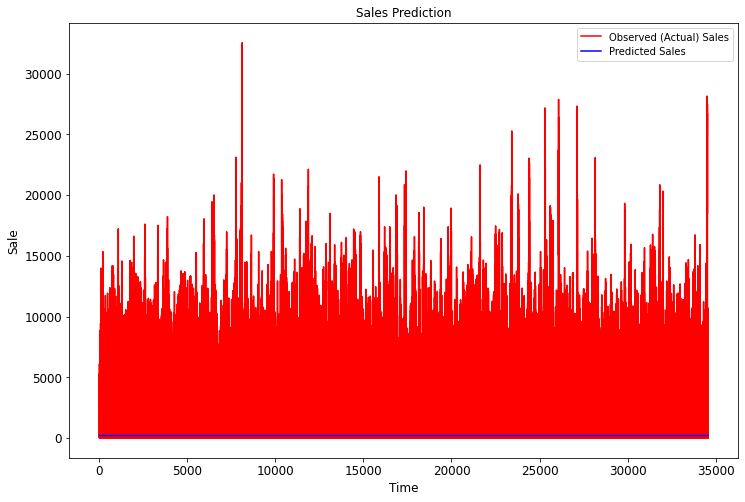

In [ ]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Observed (Actual) Sales')
plt.plot(predicted_lstm, color = 'blue', label = 'Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sale')
plt.legend()
plt.show()

#### Designing ANN - CNN


In [ ]:
#X_train = train_new.drop(['Sales','Store'],axis=1)
#X_test = test_val_new.drop(['Sales','Store'],axis=1)
#y_train = train_new['Sales']
#y_test = test_val_new['Sales']

X_train = X_train_pca
X_test = X_val_pca
y_train = train_new['Sales']
y_test = test_val_new['Sales']

In [ ]:
# Here we standardize the target
y_train = pd.DataFrame(y_train)
y_train = scaleData(y_train)

In [ ]:
# Define model callbacks
ann_model_callbacks = [keras.callbacks.ModelCheckpoint('ANN_retail.h5',monitor='val_loss',save_best_only=True,mode='auto',verbose=1,save_freq="epoch"),
                   keras.callbacks.EarlyStopping(monitor='val_loss',patience=25,mode='auto',min_delta=0.0001,restore_best_weights=True)
]

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(100, activation='relu', input_dim = X_train.shape[1]))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(1,activation='linear',kernel_initializer='normal') )

In [ ]:
# Compile
ann_model.compile(optimizer='adam', loss='mean_squared_error')
# View model parameters
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               7100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)               

In [ ]:
ann_history = ann_model.fit(X_train,y_train,
                        epochs=5,
                        validation_data=(X_test,y_test),
                        shuffle = True,
                        batch_size = batch_size,
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        callbacks = [ann_model_callbacks],
                        verbose = 1)

Epoch 1/5
7665/7676 [============================>.] - ETA: 0s - loss: 0.0038
Epoch 1: val_loss improved from inf to 50736280.00000, saving model to ANN_retail.h5
7676/7676 [==============================] - 18s 2ms/step - loss: 0.0038 - val_loss: 50736280.0000
Epoch 2/5
7662/7676 [============================>.] - ETA: 0s - loss: 0.0035
Epoch 2: val_loss did not improve from 50736280.00000
7676/7676 [==============================] - 18s 2ms/step - loss: 0.0035 - val_loss: 50736296.0000
Epoch 3/5
7665/7676 [============================>.] - ETA: 0s - loss: 0.0033
Epoch 3: val_loss improved from 50736280.00000 to 50736252.00000, saving model to ANN_retail.h5
7676/7676 [==============================] - 17s 2ms/step - loss: 0.0033 - val_loss: 50736252.0000
Epoch 4/5
7674/7676 [============================>.] - ETA: 0s - loss: 0.0032
Epoch 4: val_loss improved from 50736252.00000 to 50736244.00000, saving model to ANN_retail.h5
7676/7676 [==============================] - 18s 2ms/step - 

In [ ]:
hist = pd.DataFrame(ann_history.history)
hist['epoch'] = ann_history.epoch
hist.tail()

loss    val_loss  epoch
0  0.003795  50736280.0      0
1  0.003464  50736296.0      1
2  0.003326  50736252.0      2
3  0.003221  50736244.0      3
4  0.003149  50736268.0      4

Train: 0.003, Test: 50736224.000


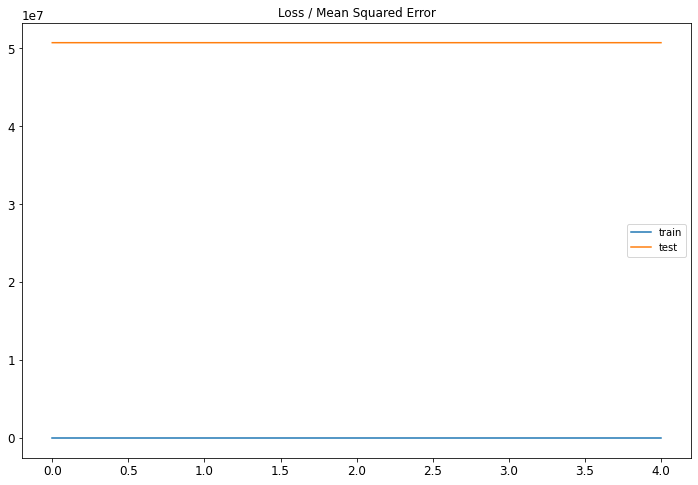

In [ ]:
# evaluate the model
train_mse = ann_model.evaluate(X_train, y_train, verbose=0)
test_mse = ann_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(ann_history.history['loss'], label='train')
plt.plot(ann_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Make prediction
predicted_ann = lstm_model.predict(X_test)
print('===================================================')
print('RMSE', np.sqrt(mean_squared_error(predicted_ann,y_test)))
print('MAE', mean_absolute_error(predicted_ann,y_test)) 
print('===================================================')

RMSE 6946.648321066684
MAE 5989.255836943057


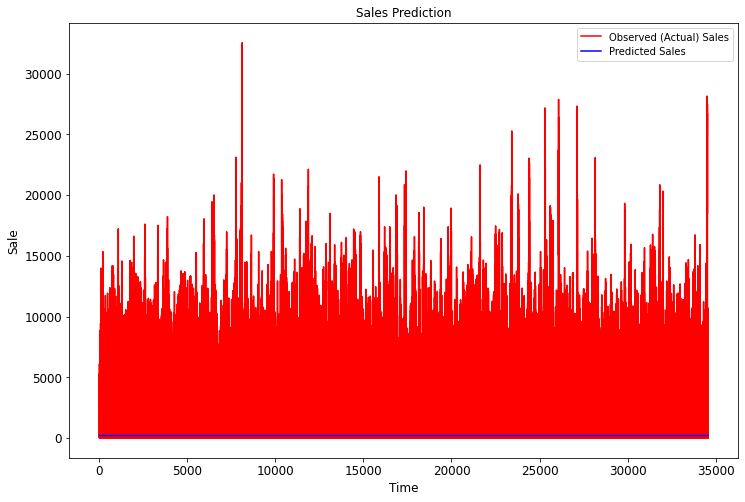

In [ ]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Observed (Actual) Sales')
plt.plot(predicted_ann, color = 'blue', label = 'Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sale')
plt.legend()
plt.show()

Hyperparameter Tunning of CNN

In [ ]:
from keras.constraints import maxnorm

In [ ]:
def build_regressor(optimizer= 'adam',init_mode='uniform',activation = 'relu', neurons = 10,dropout_rate=0.0):
  model = keras.Sequential()
  input_dim = X_train.shape[1]
  input_y_size = y_train.shape[1]

  model.add(keras.layers.Dense(neurons,activation=activation, input_dim=input_dim, kernel_initializer = 'uniform' )) # Input + hidden layer
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(neurons,activation=activation, kernel_initializer = 'uniform')) # hidden layer
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(neurons,activation=activation)) # hidden layerrelu
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(input_y_size,activation='linear',kernel_initializer='normal')) #output layer
  #Compile
  model.compile(loss ='mean_absolute_error', optimizer = optimizer,metrics=['mse'])
  return model

In [ ]:
estimator = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_regressor,verbose=1)

In [ ]:
optimizer = ['RMSprop', 'adam'] # 'SGD','Adagrad', 'Adadelta', 'adam', 'Adamax', 'Nadam']
batch_size = [128]
epochs = [5] # 
#weight_constraint = [1,2,3]
init_mode = ['uniform'] #'zero', 'glorot_normal', 'normal', 'lecun_uniform','glorot_uniform', 'he_normal', 'he_uniform'
activation = ['relu','LeakyRelu'] #'gelu', 'selu','tanh','linear'
neurons = [50, 100]
dropout_rate = [0.2, 0.3]


param_grid = dict(optimizer = optimizer, batch_size = batch_size, 
                  epochs = epochs, init_mode = init_mode,neurons=neurons,dropout_rate=dropout_rate)




#param_grid = {'epochs': [100,200,500],
#              'optimizer': [keras.optimizers.Adam(),keras.optimizers.RMSprop(),keras.optimizers.Adadelta(),
#                           keras.optimizers.Adagrad()],
#              'batch_size': [20,40,50,100,200]
#    
#}

In [ ]:
param_grid

{'batch_size': [128],
 'dropout_rate': [0.2, 0.3],
 'epochs': [5],
 'init_mode': ['uniform'],
 'neurons': [50, 100],
 'optimizer': ['RMSprop', 'adam']}

In [ ]:
#estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(estimator, X, y, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

#estimator.fit(X, y)
#prediction = estimator.predict(X)
#accuracy_score(y, prediction)

In [ ]:
#grid_search = GridSearchCV(estimator=classifier,
#                           param_grid=param_grid,
#                          scoring = 'accuracy', cv=folds, n_jobs = -1)

In [ ]:
#grid_result = grid_search.fit(X_train, y_train) 

In [ ]:
#define the number of folds 
folds = RepeatedKFold(n_splits=10, n_repeats=5,random_state=random_seed)
# define search
gsc_cnn = RandomizedSearchCV(
    estimator,
    param_distributions=param_grid,
    random_state=random_seed,
    cv=folds
)


grid_result = gsc_cnn.fit(X_train, y_train)

Epoch 1/5
6910/6910 [==============================] - 19s 3ms/step - loss: 0.0402 - mse: 0.0039
Epoch 2/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0390 - mse: 0.0037
Epoch 3/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0385 - mse: 0.0036
Epoch 4/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0382 - mse: 0.0035
Epoch 5/5
768/768 [==============================] - 1s 2ms/step - loss: 0.0373 - mse: 0.0031
Epoch 1/5
6910/6910 [==============================] - 19s 3ms/step - loss: 0.0401 - mse: 0.0039
Epoch 2/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0389 - mse: 0.0037
Epoch 3/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0385 - mse: 0.0036
Epoch 4/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0383 - mse: 0.0036
Epoch 5/5
768/768 [==============================] - 1s 2ms/step - loss: 0.0359 - mse: 0.0032
Epoch 1/5
6910/6910 [===============

In [ ]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -0.034462 using {'optimizer': 'adam', 'neurons': 100, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,stdev, param))

-0.036356 (0.000971) with: {'optimizer': 'RMSprop', 'neurons': 50, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}
-0.035534 (0.000329) with: {'optimizer': 'adam', 'neurons': 50, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}
-0.035232 (0.001001) with: {'optimizer': 'RMSprop', 'neurons': 100, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}
-0.034462 (0.000326) with: {'optimizer': 'adam', 'neurons': 100, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}
-0.036805 (0.000816) with: {'optimizer': 'RMSprop', 'neurons': 50, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.3, 'batch_size': 128}
-0.036285 (0.000393) with: {'optimizer': 'adam', 'neurons': 50, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.3, 'batch_size': 128}
-0.036281 (0.001093) with: {'optimizer': 'RMSprop', 'neurons': 100, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.3, 'batch_size': 128

In [ ]:
print(f'Total time for the case study is: {time.time()-timetotal}')

Total time for the case study is: 71128.68813586235


# End Case Study